In [406]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans, k_means

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# import sys
# !conda list Check the packages installed

In [407]:
df = pd.read_csv('churn_clean.csv')

In [408]:
df.head()

CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  ...  MonthlyCharge Bandwidth_GB_Year Item1  \
0  99927  56.25100 -133.37571  ...     172.455519        904.536110     5   
1  48661  44.32893  -84.24080  ...     242.632554        800.982766     3   
2  97148  45.35589 -123.24657  ...     159.947583       2054.706961     4   
3  92014  32.96687 -117.24798  ...     119.956840       2164.579412     4   
4  77461  29.38012  -95.80673  ...     149.948316        271.493436     4   

  Item2  Item3  Item4  Item5 Item6 Item7 Item8  
0     5      5      3      4     4     3     4  
1     4      3      3      4     3     4     4  
2     4      2      4      4     3     3     3  
3     4      4      2      5     4     3     3  
4     4      4      3      4     4     4     5  

[5 rows x 50 columns]

In [409]:
df.shape

(10000, 50)

In [410]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [411]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [412]:
df.describe()

CaseOrder           Zip           Lat           Lng     Population  \
count  10000.00000  10000.000000  10000.000000  10000.000000   10000.000000   
mean    5000.50000  49153.319600     38.757567    -90.782536    9756.562400   
std     2886.89568  27532.196108      5.437389     15.156142   14432.698671   
min        1.00000    601.000000     17.966120   -171.688150       0.000000   
25%     2500.75000  26292.500000     35.341827    -97.082812     738.000000   
50%     5000.50000  48869.500000     39.395800    -87.918800    2910.500000   
75%     7500.25000  71866.500000     42.106908    -80.088745   13168.000000   
max    10000.00000  99929.000000     70.640660    -65.667850  111850.000000   

         Children           Age         Income  Outage_sec_perweek  \
count  10000.0000  10000.000000   10000.000000        10000.000000   
mean       2.0877     53.078400   39806.926771           10.001848   
std        2.1472     20.698882   28199.916702            2.976019   
min        0.0000     18.000000     348.670000            0.099747   
25%        0.0000     35.000000   19224.717500            8.018214   
50%        1.0000     53.000000   33170.605000           10.018560   
75%        3.0000     71.000000   53246.170000           11.969485   
max       10.0000     89.000000  258900.700000           21.207230   

              Email  ...  MonthlyCharge  Bandwidth_GB_Year         Item1  \
count  10000.000000  ...   10000.000000       10000.000000  10000.000000   
mean      12.016000  ...     172.624816        3392.341550      3.490800   
std        3.025898  ...      42.943094        2185.294852      1.037797   
min        1.000000  ...      79.978860         155.506715      1.000000   
25%       10.000000  ...     139.979239        1236.470827      3.000000   
50%       12.000000  ...     167.484700        3279.536903      3.000000   
75%       14.000000  ...     200.734725        5586.141369      4.000000   
max       23.000000  ...     290.160419        7158.981530      7.000000   

              Item2         Item3         Item4         Item5         Item6  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       3.505100      3.487000      3.497500      3.492900      3.497300   
std        1.034641      1.027977      1.025816      1.024819      1.033586   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        3.000000      3.000000      3.000000      3.000000      3.000000   
50%        4.000000      3.000000      3.000000      3.000000      3.000000   
75%        4.000000      4.000000      4.000000      4.000000      4.000000   
max        7.000000      8.000000      7.000000      7.000000      8.000000   

              Item7         Item8  
count  10000.000000  10000.000000  
mean       3.509500      3.495600  
std        1.028502      1.028633  
min        1.000000      1.000000  
25%        3.000000      3.000000  
50%        4.000000      3.000000  
75%        4.000000      4.000000  
max        7.000000      8.000000  

[8 rows x 23 columns]

In [413]:
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 36:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature CaseOrder :10000
The number of values for feature Customer_id :10000
The number of values for feature Interaction :10000
The number of values for feature UID :10000
The number of values for feature City :6058
The number of values for feature State :52
The number of values for feature County :1620
The number of values for feature Zip :8583
The number of values for feature Lat :8563
The number of values for feature Lng :8630
The number of values for feature Population :5933
The number of values for feature Area :3 -- ['Rural' 'Suburban' 'Urban']
The number of values for feature TimeZone :25 -- ['America/Anchorage' 'America/Boise' 'America/Chicago' 'America/Denver'
 'America/Detroit' 'America/Indiana/Indianapolis' 'America/Indiana/Knox'
 'America/Indiana/Marengo' 'America/Indiana/Petersburg'
 'America/Indiana/Tell_City' 'America/Indiana/Vincennes'
 'America/Indiana/Winamac' 'America/Juneau' 'America/Kentucky/Louisville'
 'America/Los_Angeles' 'America/Meno

In [414]:
df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', \
         'UID', 'City','County', 'Zip', 'Lat', 'Lng',\
         'County', 'Zip', 'Lat', 'Lng', 'TimeZone',\
        'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'], axis = 1)

In [415]:
df['Email']

0       10
1       12
2        9
3       15
4       16
        ..
9995    12
9996    15
9997    10
9998    14
9999    17
Name: Email, Length: 10000, dtype: int64

In [416]:
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 36:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature State :52
The number of values for feature Population :5933
The number of values for feature Area :3 -- ['Rural' 'Suburban' 'Urban']
The number of values for feature Job :639
The number of values for feature Children :11 -- [ 0  1  2  3  4  5  6  7  8  9 10]
The number of values for feature Age :72
The number of values for feature Income :9993
The number of values for feature Marital :5 -- ['Divorced' 'Married' 'Never Married' 'Separated' 'Widowed']
The number of values for feature Gender :3 -- ['Female' 'Male' 'Nonbinary']
The number of values for feature Churn :2 -- ['No' 'Yes']
The number of values for feature Outage_sec_perweek :9986
The number of values for feature Email :23 -- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
The number of values for feature Contacts :8 -- [0 1 2 3 4 5 6 7]
The number of values for feature Yearly_equip_failure :6 -- [0 1 2 3 4 6]
The number of values for feature Techie :2 -- ['No' 'Yes']
The n

In [417]:
#df= pd.get_dummies(df)

In [418]:
#df.head()

In [419]:
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 36:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature State :52
The number of values for feature Population :5933
The number of values for feature Area :3 -- ['Rural' 'Suburban' 'Urban']
The number of values for feature Job :639
The number of values for feature Children :11 -- [ 0  1  2  3  4  5  6  7  8  9 10]
The number of values for feature Age :72
The number of values for feature Income :9993
The number of values for feature Marital :5 -- ['Divorced' 'Married' 'Never Married' 'Separated' 'Widowed']
The number of values for feature Gender :3 -- ['Female' 'Male' 'Nonbinary']
The number of values for feature Churn :2 -- ['No' 'Yes']
The number of values for feature Outage_sec_perweek :9986
The number of values for feature Email :23 -- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
The number of values for feature Contacts :8 -- [0 1 2 3 4 5 6 7]
The number of values for feature Yearly_equip_failure :6 -- [0 1 2 3 4 6]
The number of values for feature Techie :2 -- ['No' 'Yes']
The n

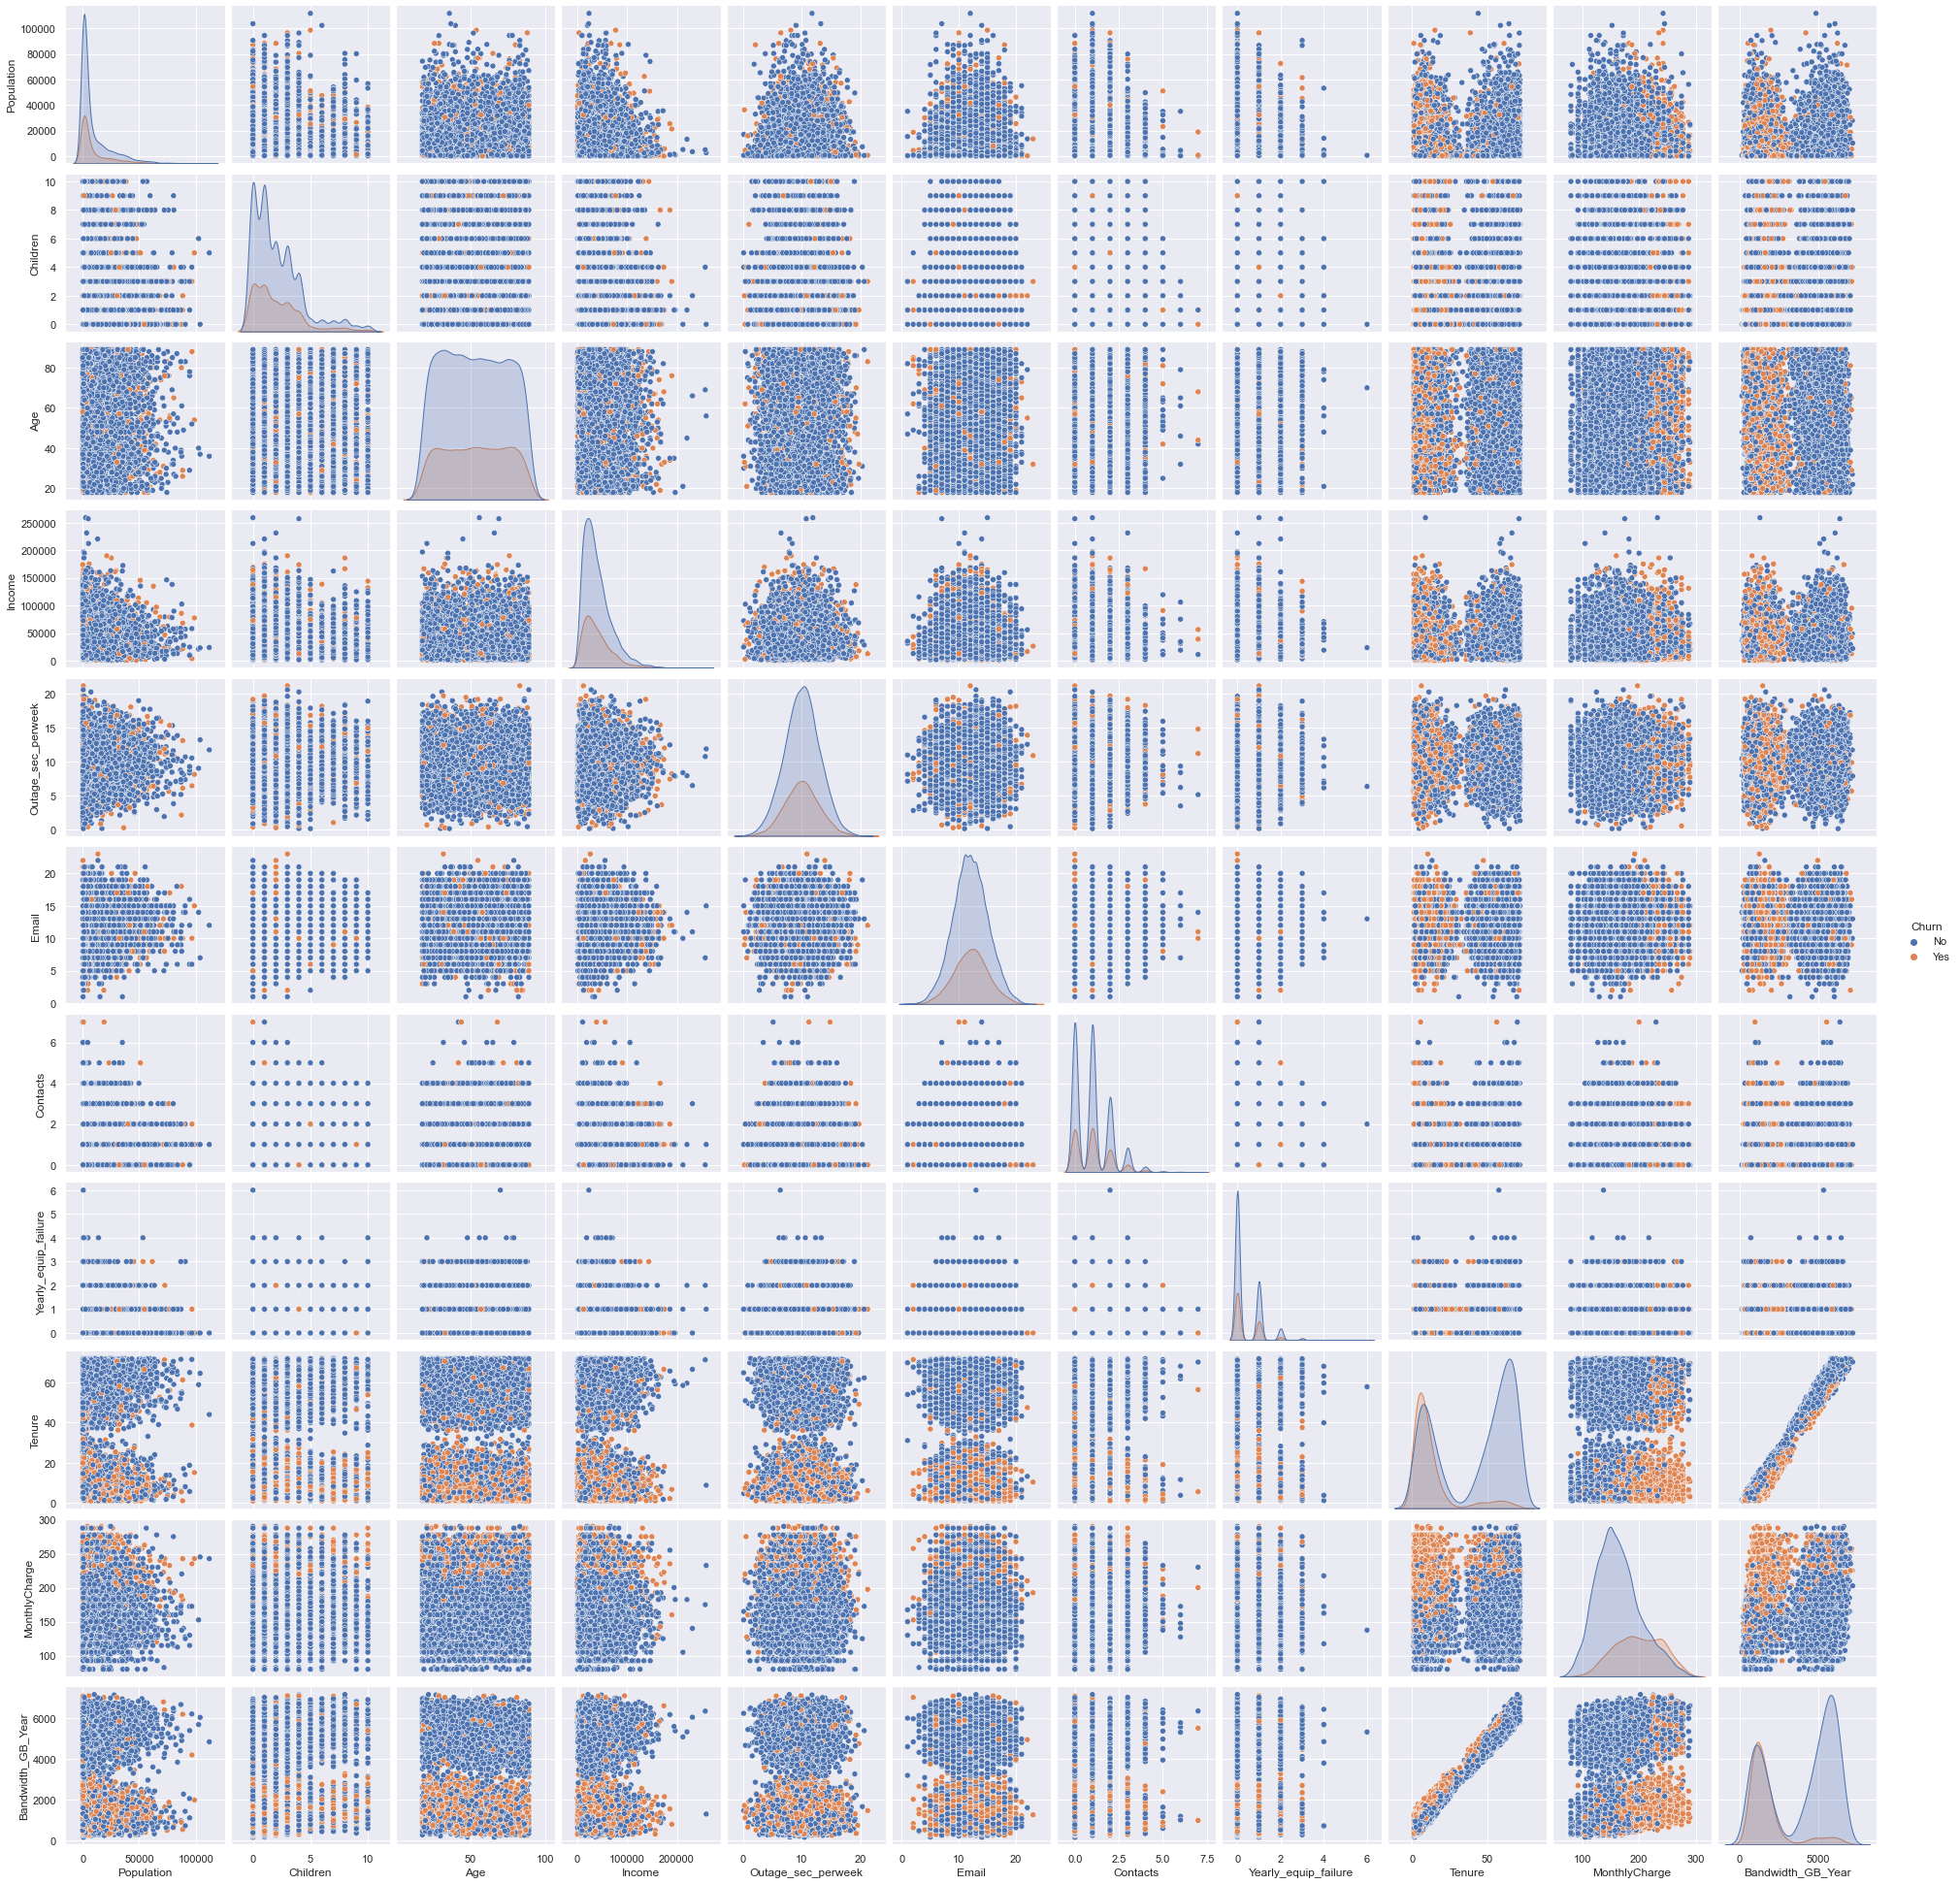

In [420]:
g = sns.pairplot(df, hue = 'Churn')

In [421]:
df.columns

Index(['State', 'Population', 'Area', 'Job', 'Children', 'Age', 'Income',
       'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year'],
      dtype='object')

In [422]:
features = ['State','Area', 'Job', 'Marital', 'Gender', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'] 

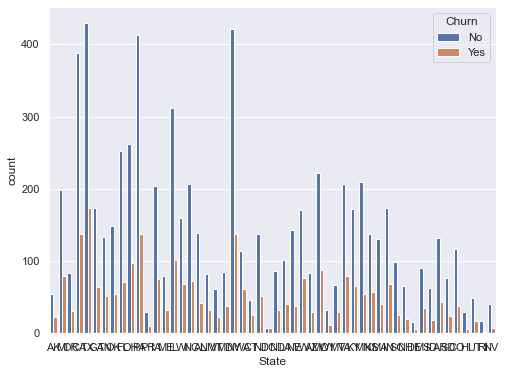

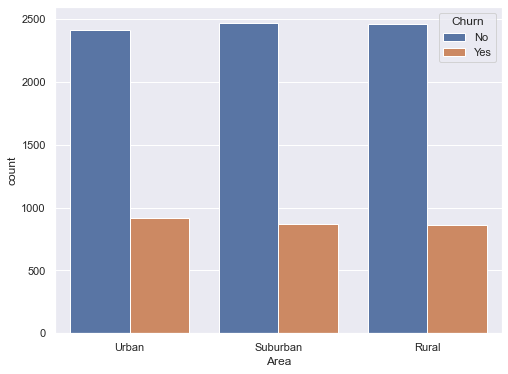

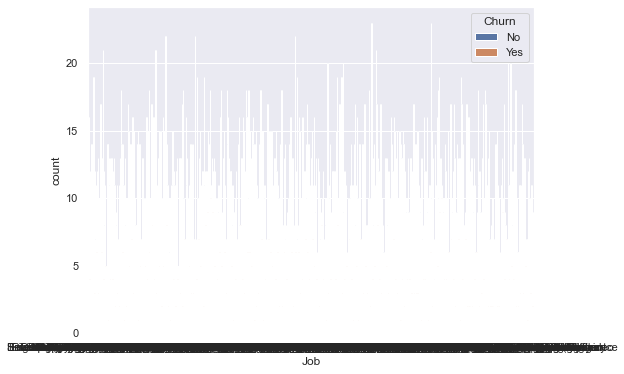

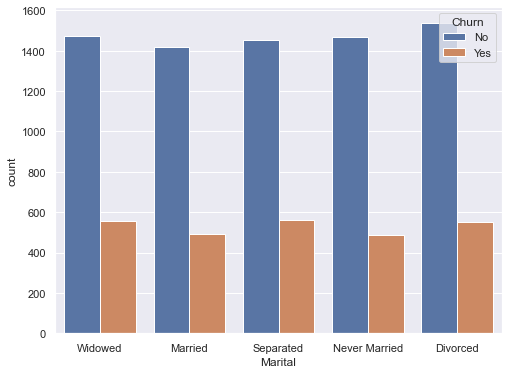

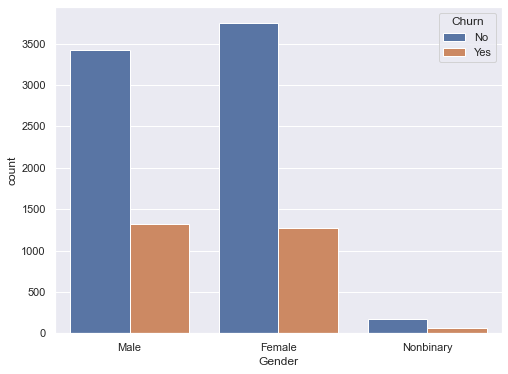

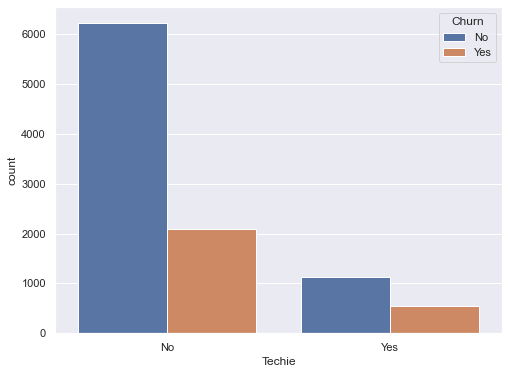

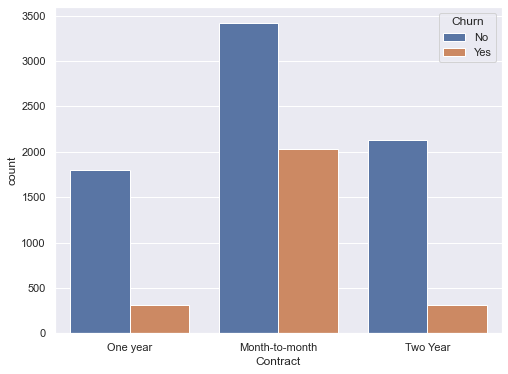

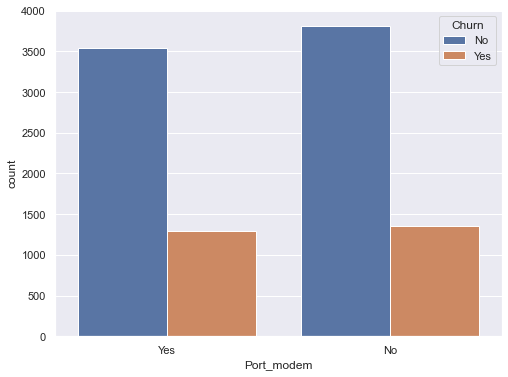

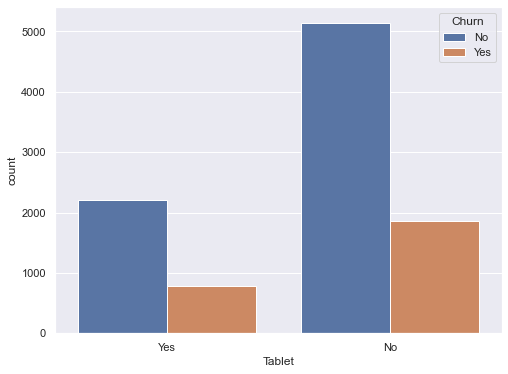

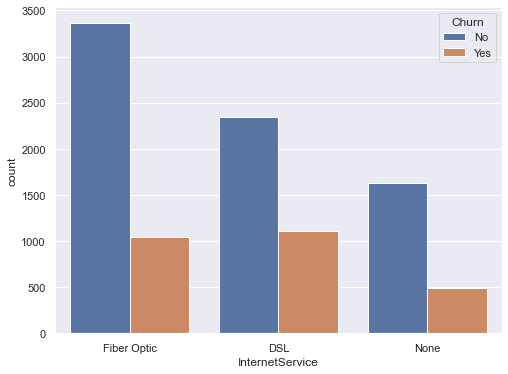

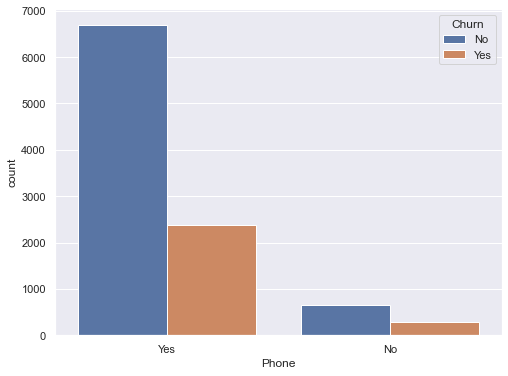

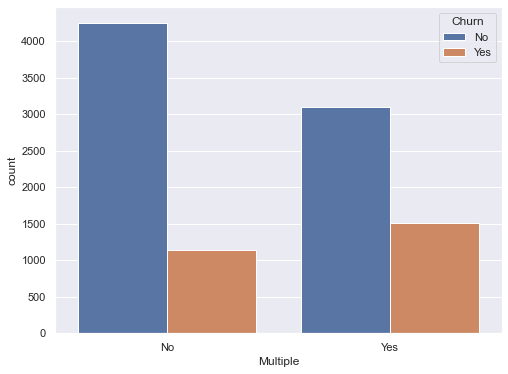

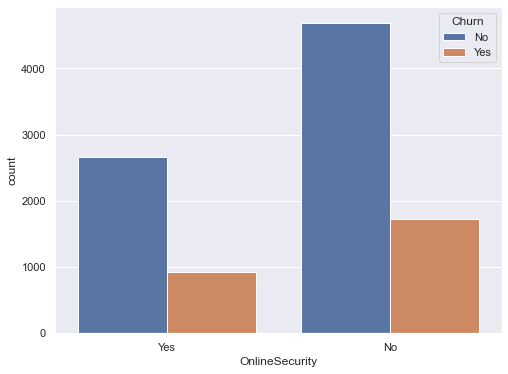

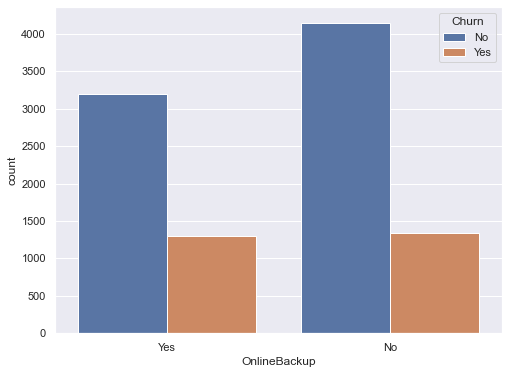

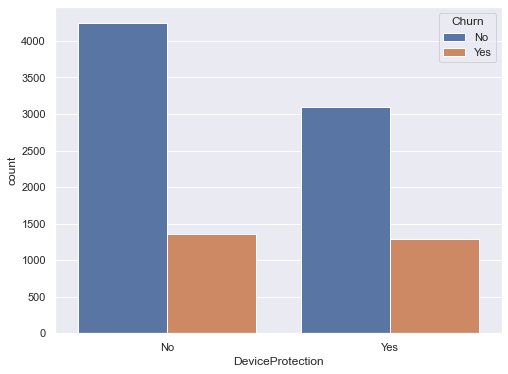

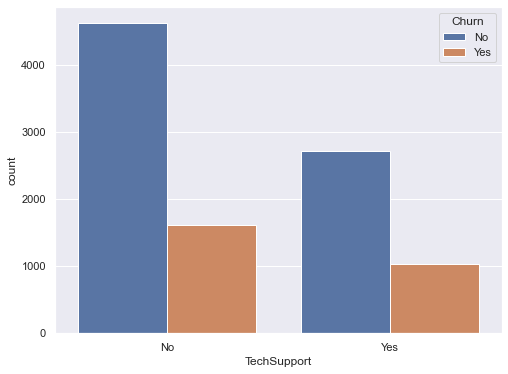

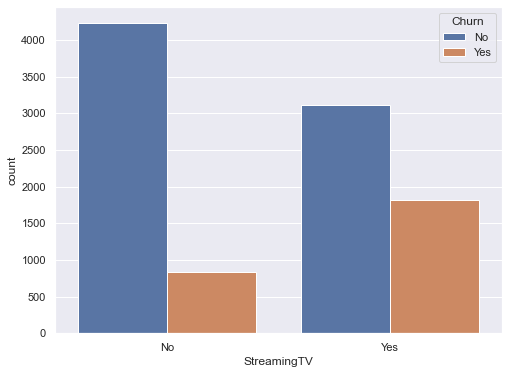

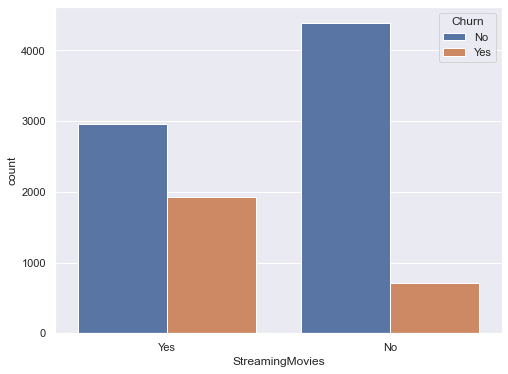

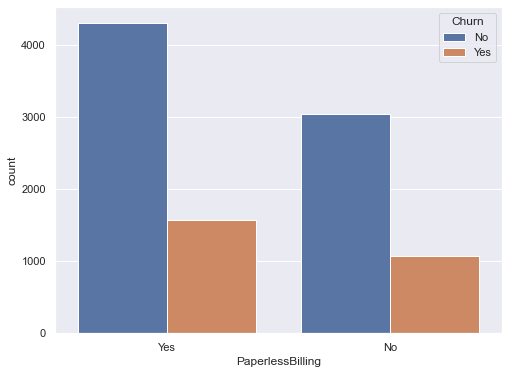

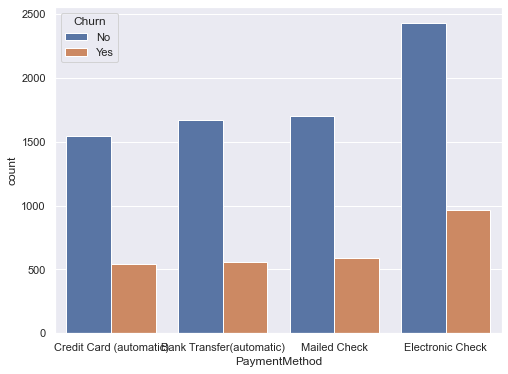

In [423]:
for f in features:
    plt.figure()
    ax = sns.countplot(x=f, data = df, hue = 'Churn')

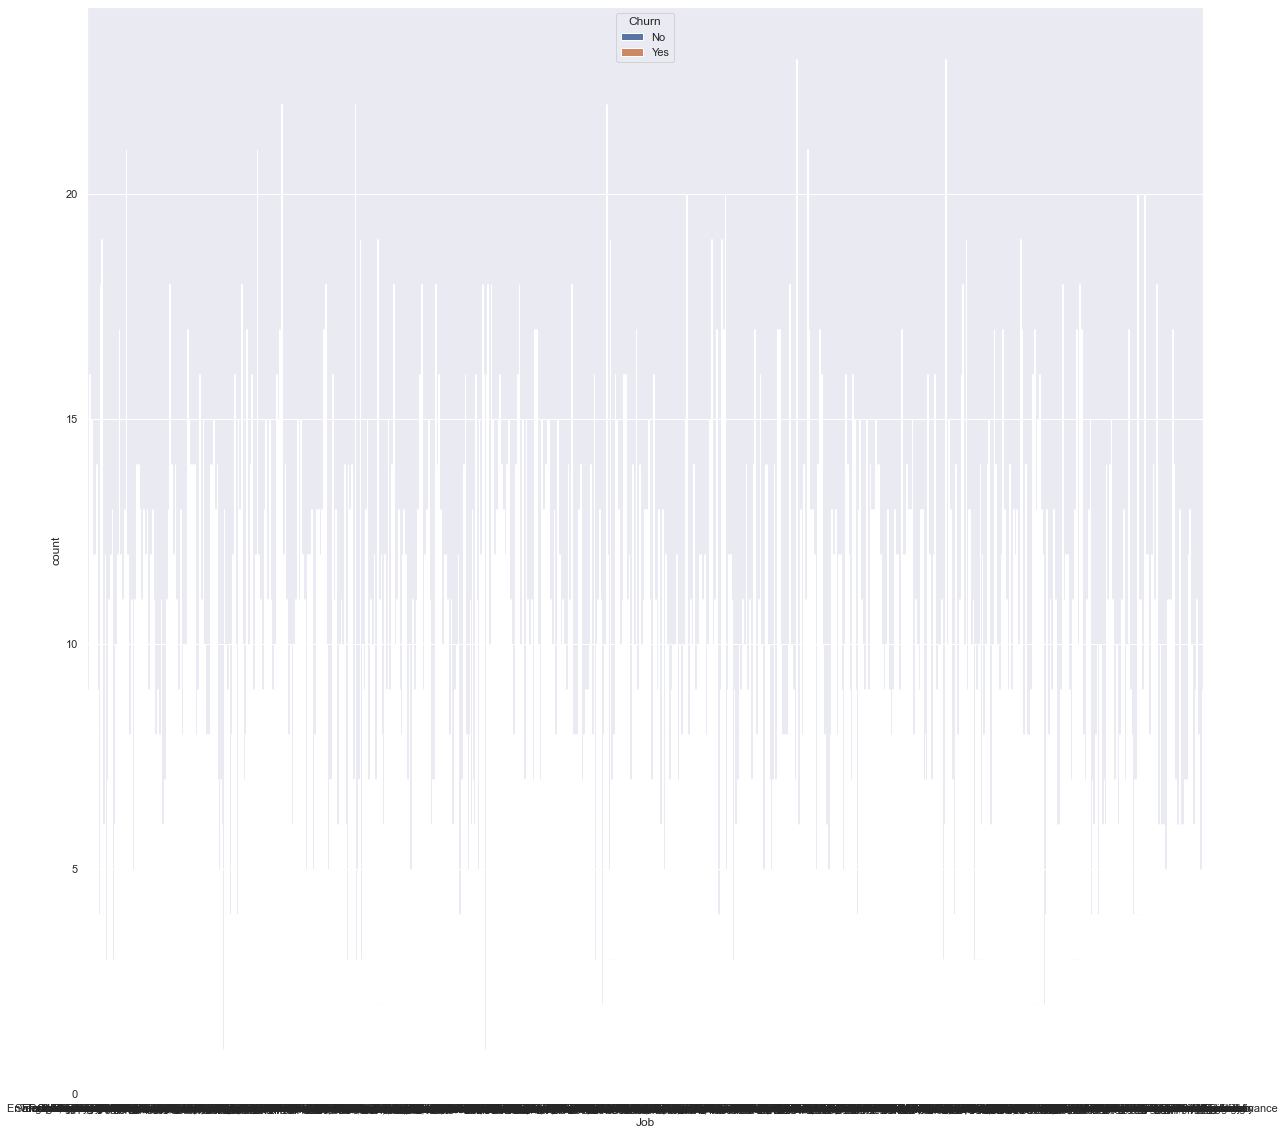

In [424]:
%matplotlib inline
plt.rcParams['figure.figsize']=20,20
ax = sns.countplot(x='Job', data = df, hue = 'Churn')

In [425]:

table = pd.pivot_table(df, values='Churn', index=['Job'],
                     aggfunc='count')
display(table)

Churn
Job                                    
Academic librarian                   20
Accommodation manager                18
Accountant, chartered                20
Accountant, chartered certified       6
Accountant, chartered management     12
...                                 ...
Water quality scientist              17
Web designer                         12
Wellsite geologist                   13
Writer                                9
Youth worker                         14

[639 rows x 1 columns]

###This was the pivot table that signified that the columns of job was going to be dropped

In [426]:
result = table.sort_values(('Churn'), ascending=False)

In [427]:
display(result)

Churn
Job                                        
Occupational psychologist                30
Hospital pharmacist                      28
Comptroller                              28
Horticultural therapist                  28
Special effects artist                   27
...                                     ...
Arboriculturist                           6
Control and instrumentation engineer      6
Toxicologist                              6
Travel agency manager                     6
Accountant, chartered certified           6

[639 rows x 1 columns]

In [428]:
df = df.drop(['Job'], axis = 1)

In [429]:
df.columns

Index(['State', 'Population', 'Area', 'Children', 'Age', 'Income', 'Marital',
       'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year'],
      dtype='object')

In [430]:
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 36:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature State :52
The number of values for feature Population :5933
The number of values for feature Area :3 -- ['Rural' 'Suburban' 'Urban']
The number of values for feature Children :11 -- [ 0  1  2  3  4  5  6  7  8  9 10]
The number of values for feature Age :72
The number of values for feature Income :9993
The number of values for feature Marital :5 -- ['Divorced' 'Married' 'Never Married' 'Separated' 'Widowed']
The number of values for feature Gender :3 -- ['Female' 'Male' 'Nonbinary']
The number of values for feature Churn :2 -- ['No' 'Yes']
The number of values for feature Outage_sec_perweek :9986
The number of values for feature Email :23 -- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
The number of values for feature Contacts :8 -- [0 1 2 3 4 5 6 7]
The number of values for feature Yearly_equip_failure :6 -- [0 1 2 3 4 6]
The number of values for feature Techie :2 -- ['No' 'Yes']
The number of values for feature Contract :3 --

In [431]:
###checking to see if there are any null values in the columns
df.isnull().sum()

State                   0
Population              0
Area                    0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
dtype: int64

In [432]:
print(df.shape)

(10000, 31)


###Adding Non Binary to Gender

In [433]:
df.loc[df.Gender == "Nonbinary", "Gender"] = "Female"


In [434]:
table = pd.pivot_table(df, values='Churn', index=['Gender'],
                     aggfunc='count')
display(table)

Churn
Gender       
Female   5256
Male     4744

In [435]:
df = pd.get_dummies(df)

In [436]:
###this now shows that after making the categorical variables into numeric, the colums increased exponentially
print(df.shape)

(10000, 109)


###After creating the dummies i am only keeping the columns of TX, NY, PA, and CA since this 
\makes up 25% of the states.

Adding Non Binary to Gender

In [437]:
df = df.drop(['State_AK', 'State_AL', 'State_AR', 'State_AZ',
 'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL',
 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN',
 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME',
 'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC',
 'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV',
 'State_OH', 'State_OK', 'State_OR', 'State_PR',
 'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_UT',
 'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY'], axis = 1)

In [438]:
df

Population  Children  Age    Income  Outage_sec_perweek  Email  \
0             38         0   68  28561.99            7.978323     10   
1          10446         1   27  21704.77           11.699080     12   
2           3735         4   50   9609.57           10.752800      9   
3          13863         1   48  18925.23           14.913540     15   
4          11352         0   83  40074.19            8.147417     16   
...          ...       ...  ...       ...                 ...    ...   
9995         640         3   23  55723.74            9.415935     12   
9996       77168         4   48  34129.34            6.740547     15   
9997         406         1   48  45983.43            6.590911     10   
9998       35575         1   39  16667.58           12.071910     14   
9999       12230         1   28   9020.92           11.754720     17   

      Contacts  Yearly_equip_failure     Tenure  MonthlyCharge  ...  \
0            0                     1   6.795513     172.455519  ...   
1            0                     1   1.156681     242.632554  ...   
2            0                     1  15.754144     159.947583  ...   
3            2                     0  17.087227     119.956840  ...   
4            2                     1   1.670972     149.948316  ...   
...        ...                   ...        ...            ...  ...   
9995         2                     0  68.197130     159.979400  ...   
9996         2                     0  61.040370     207.481100  ...   
9997         0                     0  47.416890     169.974100  ...   
9998         1                     0  71.095600     252.624000  ...   
9999         1                     0  63.350860     217.484000  ...   

      StreamingTV_No  StreamingTV_Yes  StreamingMovies_No  \
0                  1                0                   0   
1                  0                1                   0   
2                  1                0                   0   
3                  0                1                   1   
4                  0                1                   1   
...              ...              ...                 ...   
9995               1                0                   1   
9996               0                1                   1   
9997               1                0                   1   
9998               0                1                   0   
9999               1                0                   0   

      StreamingMovies_Yes  PaperlessBilling_No  PaperlessBilling_Yes  \
0                       1                    0                     1   
1                       1                    0                     1   
2                       1                    0                     1   
3                       0                    0                     1   
4                       0                    1                     0   
...                   ...                  ...                   ...   
9995                    0                    1                     0   
9996                    0                    1                     0   
9997                    0                    0                     1   
9998                    1                    0                     1   
9999                    1                    0                     1   

      PaymentMethod_Bank Transfer(automatic)  \
0                                          0   
1                                          1   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
9995                                       0   
9996                                       0   
9997                                       1   
9998                                       0   
9999                                       0   

      PaymentMethod_Credit Card (automatic)  PaymentMethod_Electronic Check  \
0                                 

In [455]:
new_df = df

In [456]:
new_df

Population  Children  Age    Income  Outage_sec_perweek  Email  \
0             38         0   68  28561.99            7.978323     10   
1          10446         1   27  21704.77           11.699080     12   
2           3735         4   50   9609.57           10.752800      9   
3          13863         1   48  18925.23           14.913540     15   
4          11352         0   83  40074.19            8.147417     16   
...          ...       ...  ...       ...                 ...    ...   
9995         640         3   23  55723.74            9.415935     12   
9996       77168         4   48  34129.34            6.740547     15   
9997         406         1   48  45983.43            6.590911     10   
9998       35575         1   39  16667.58           12.071910     14   
9999       12230         1   28   9020.92           11.754720     17   

      Contacts  Yearly_equip_failure     Tenure  MonthlyCharge  ...  \
0            0                     1   6.795513     172.455519  ...   
1            0                     1   1.156681     242.632554  ...   
2            0                     1  15.754144     159.947583  ...   
3            2                     0  17.087227     119.956840  ...   
4            2                     1   1.670972     149.948316  ...   
...        ...                   ...        ...            ...  ...   
9995         2                     0  68.197130     159.979400  ...   
9996         2                     0  61.040370     207.481100  ...   
9997         0                     0  47.416890     169.974100  ...   
9998         1                     0  71.095600     252.624000  ...   
9999         1                     0  63.350860     217.484000  ...   

      StreamingTV_No  StreamingTV_Yes  StreamingMovies_No  \
0                  1                0                   0   
1                  0                1                   0   
2                  1                0                   0   
3                  0                1                   1   
4                  0                1                   1   
...              ...              ...                 ...   
9995               1                0                   1   
9996               0                1                   1   
9997               1                0                   1   
9998               0                1                   0   
9999               1                0                   0   

      StreamingMovies_Yes  PaperlessBilling_No  PaperlessBilling_Yes  \
0                       1                    0                     1   
1                       1                    0                     1   
2                       1                    0                     1   
3                       0                    0                     1   
4                       0                    1                     0   
...                   ...                  ...                   ...   
9995                    0                    1                     0   
9996                    0                    1                     0   
9997                    0                    0                     1   
9998                    1                    0                     1   
9999                    1                    0                     1   

      PaymentMethod_Bank Transfer(automatic)  \
0                                          0   
1                                          1   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
9995                                       0   
9996                                       0   
9997                                       1   
9998                                       0   
9999                                       0   

      PaymentMethod_Credit Card (automatic)  PaymentMethod_Electronic Check  \
0                                 

In [440]:
# Running Kmeans

X_train = new_df.values

# We wills start with 5 clusters

kmeans = KMeans(n_clusters=5, random_state=540)
kmeans = kmeans.fit(X_train)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia is: ", kmeans.inertia_)

The clusters are:  [3 3 3 ... 1 0 3]
The Inertia is:  1951728880927.9187


In [441]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters = range(2,40) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

The innertia for : 2 Clusters is: 4969813185011.506
The innertia for : 3 Clusters is: 3603948604638.234
The innertia for : 4 Clusters is: 2505243998867.092
The innertia for : 5 Clusters is: 1951729182713.5498
The innertia for : 6 Clusters is: 1648911691625.0159
The innertia for : 7 Clusters is: 1396322259252.374
The innertia for : 8 Clusters is: 1240488732618.6763
The innertia for : 9 Clusters is: 1091174275421.4858
The innertia for : 10 Clusters is: 973731040221.5801
The innertia for : 11 Clusters is: 885320143808.9514
The innertia for : 12 Clusters is: 822315974959.8187
The innertia for : 13 Clusters is: 761393848344.1694
The innertia for : 14 Clusters is: 710747967564.4254
The innertia for : 15 Clusters is: 664290499807.5399
The innertia for : 16 Clusters is: 625304102585.9623
The innertia for : 17 Clusters is: 587241491495.2871
The innertia for : 18 Clusters is: 552600606902.5294
The innertia for : 19 Clusters is: 525013226449.9955
The innertia for : 20 Clusters is: 495236775353.93

In [442]:
no_of_clusters

range(2, 40)

Text(0.5, 1.0, 'Inertia Plot per k')

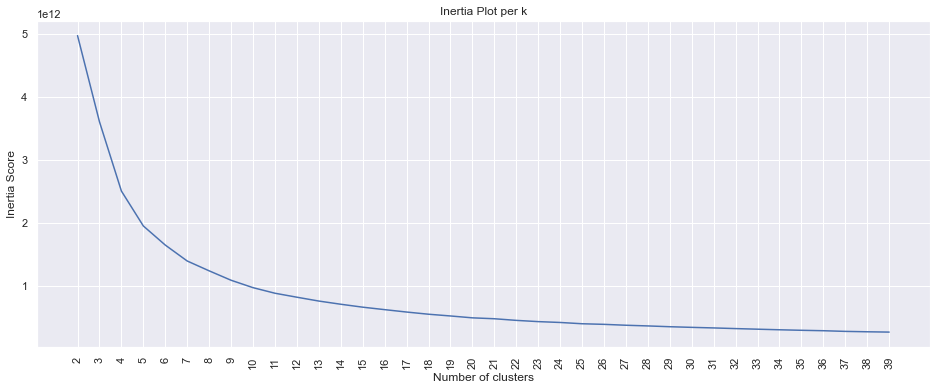

In [443]:

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

#The plot above shows us which is the best cluster amount to use

In [444]:

# Running K means on 7 clusters

kmeans = KMeans(n_clusters=7, random_state=2)
kmeans = kmeans.fit(X_train)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,7)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4","Cluster 5","Cluster 6"])

# display
countscldf

Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5  Cluster 6
0       2612       1026       1861        548        924       2724        305

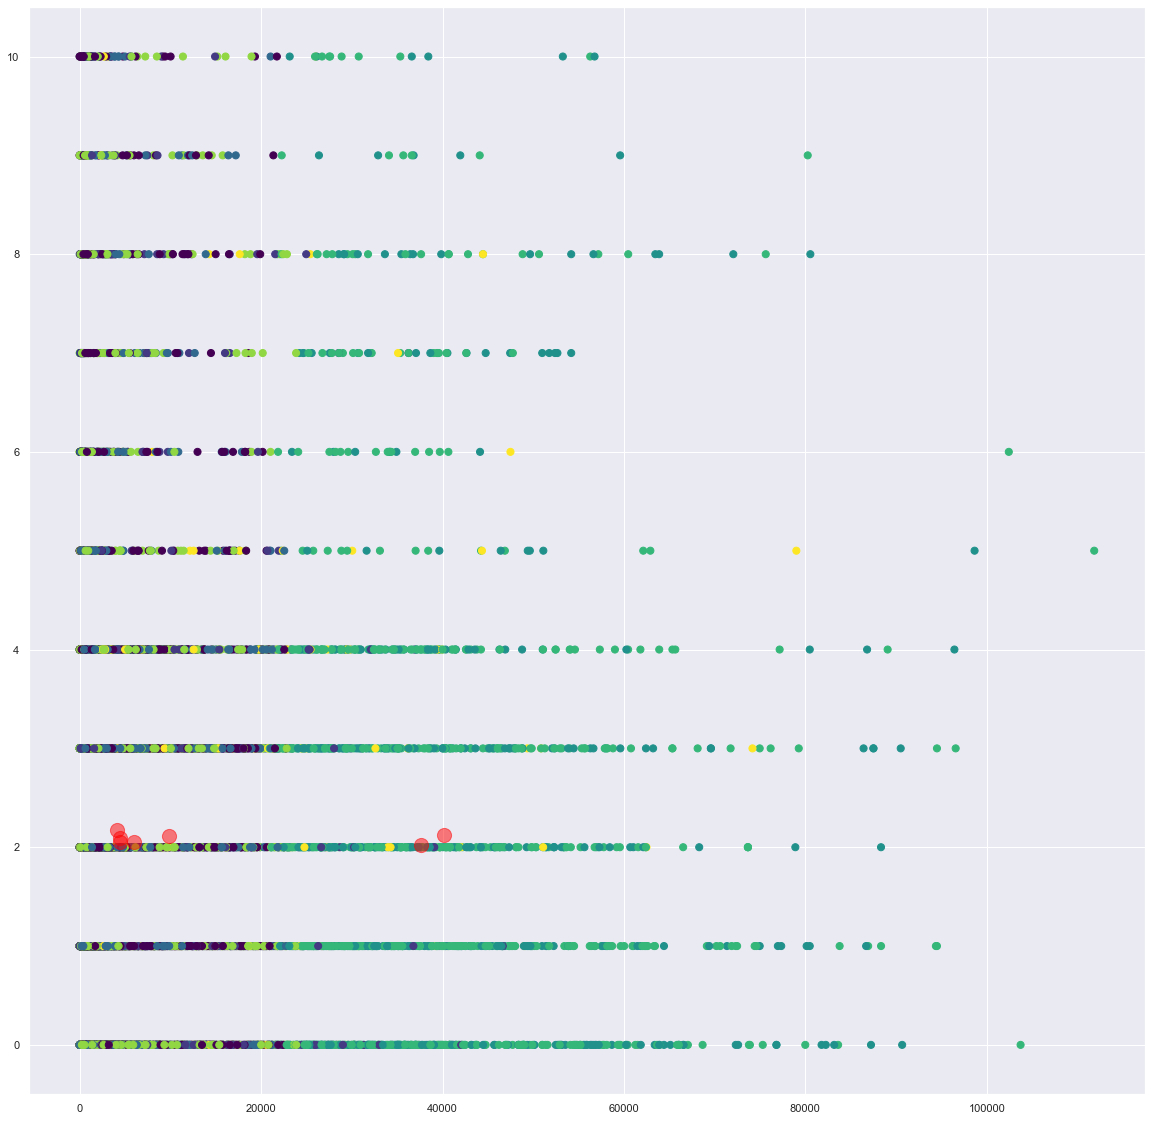

In [445]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=predictions, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

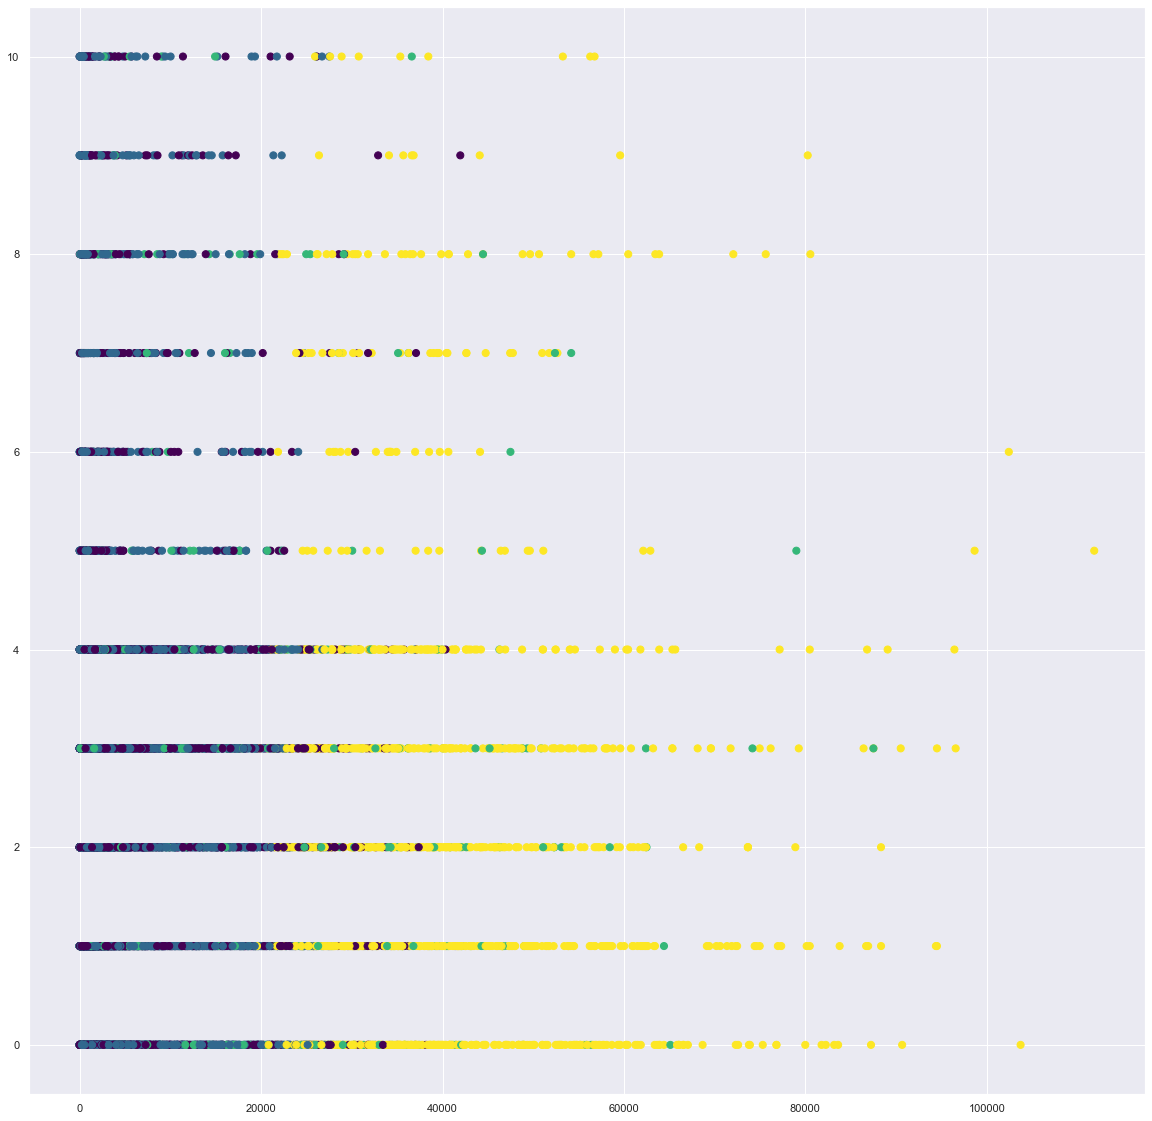

In [446]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X_train.shape[0])[:n_clusters]
    centers = X_train[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X_train, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X_train, 4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels,
            s=50, cmap='viridis');

Explained variance ratio (first two components): [0.788697 0.206564]


<Figure size 1440x1440 with 0 Axes>

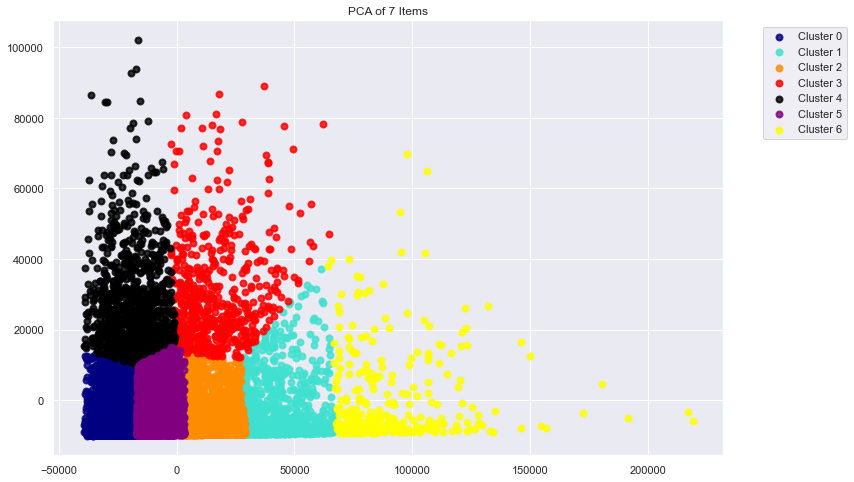

In [447]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4","Cluster 5","Cluster 6"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black','purple','yellow']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4,5,6], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 7 Items')
plt.show()

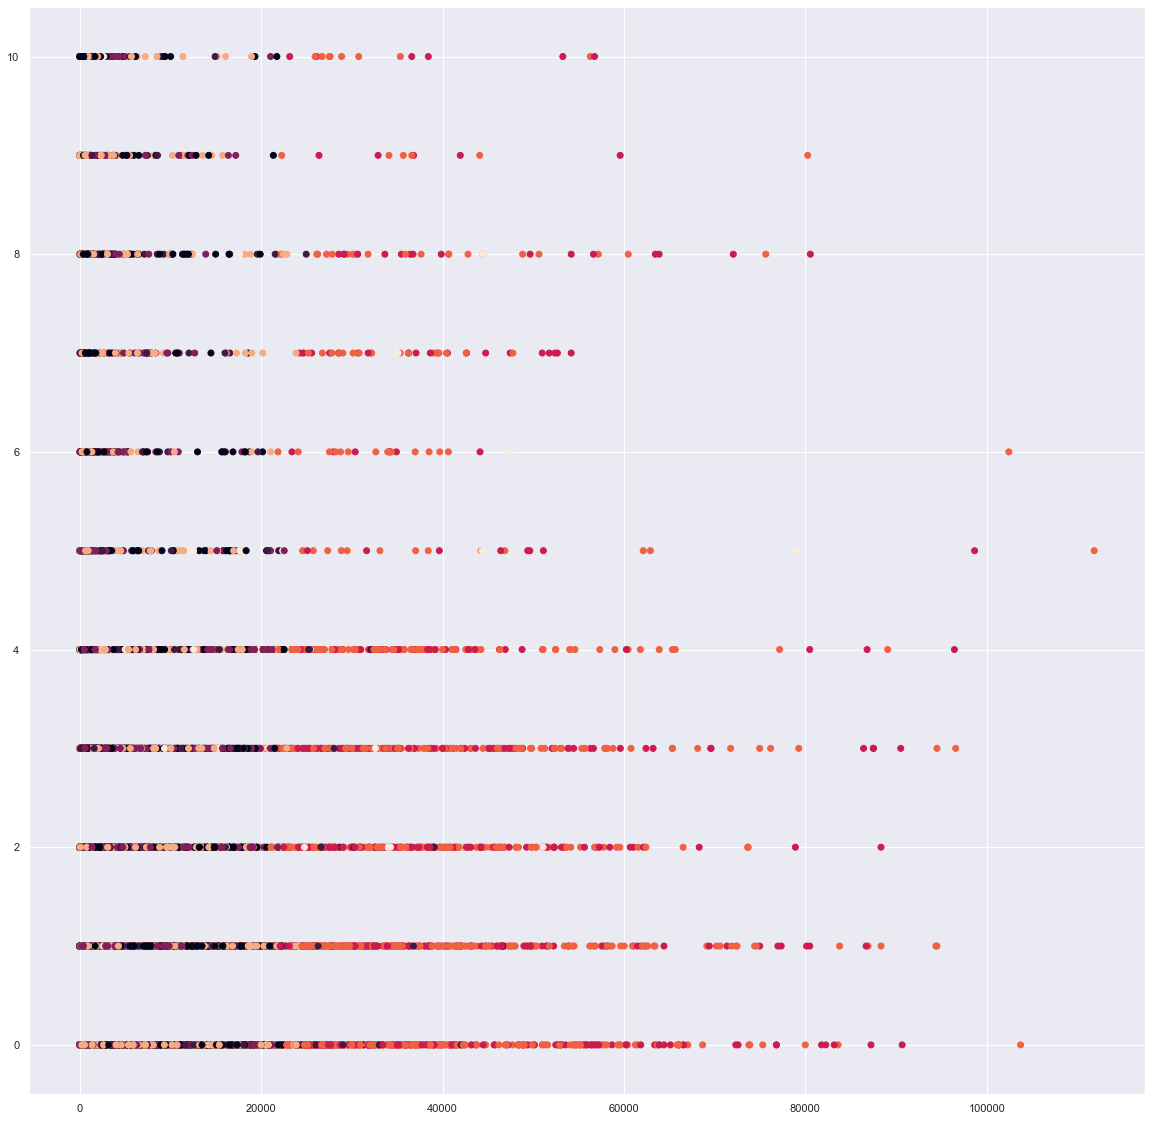

In [448]:
###this scatterplot is for the knn model 
import matplotlib.pyplot as plt
xs = X_train[:,0]
ys = X_train[:,1]
plt.scatter(xs,ys,c=predictions)
plt.show()


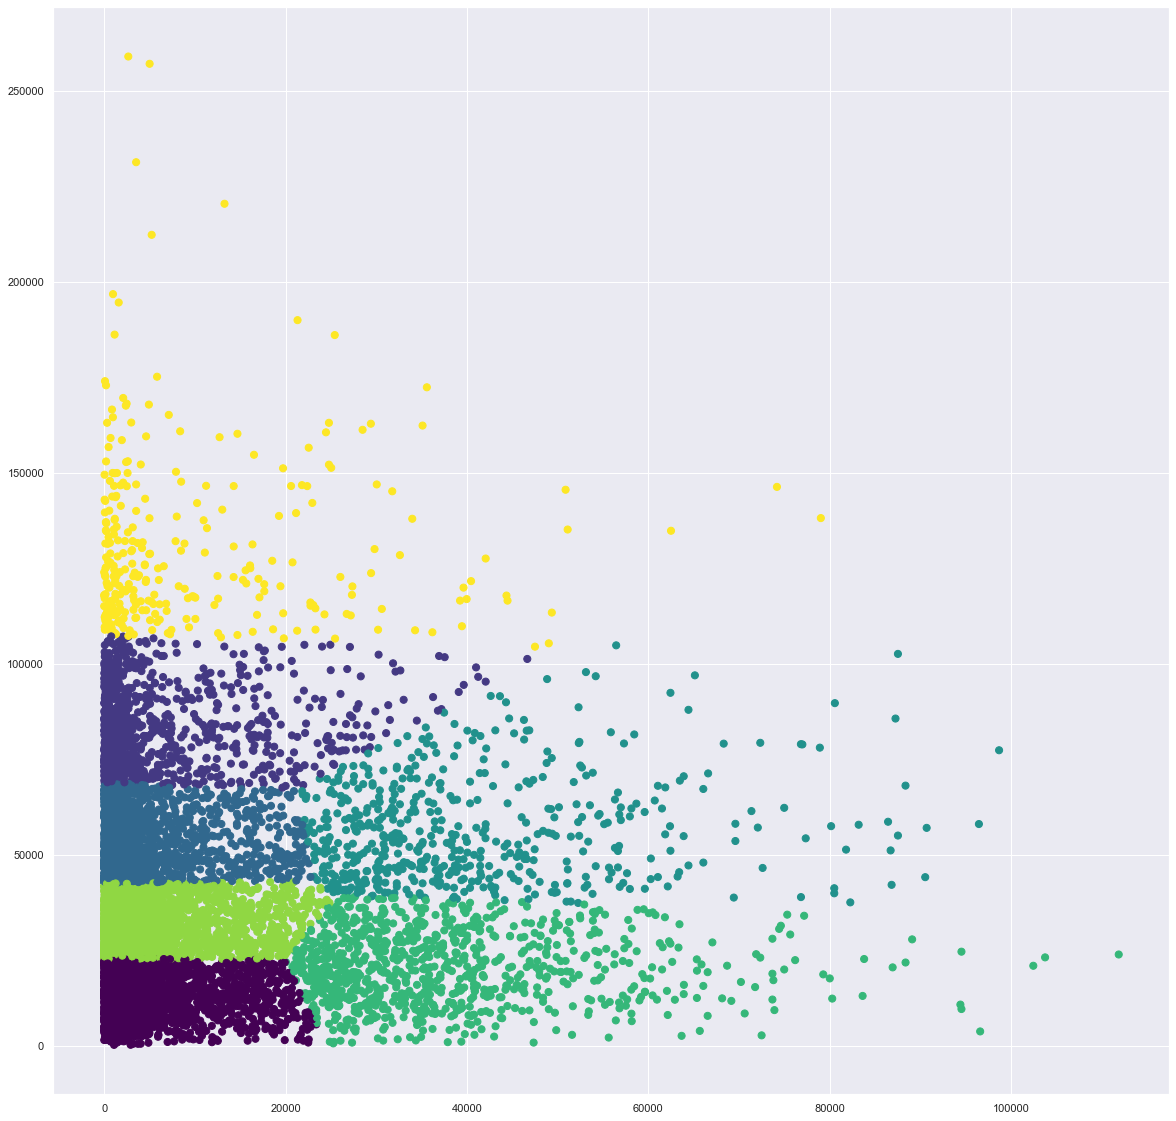

In [449]:
plt.scatter(X_train[:, 0], X_train[:, 3], c=predictions, s=50, cmap='viridis')


In [450]:
sad = pd.DataFrame({'labels': labels, 'churn': churn})
print(sad)

      labels  churn
0          1      0
1          1      1
2          1      0
3          1      0
4          0      1
...      ...    ...
9995       0      0
9996       3      0
9997       0      0
9998       3      0
9999       1      0

[10000 rows x 2 columns]


In [451]:
print(churn.shape)
print(labels.shape)

(10000,)
(10000,)


In [452]:
print(df.columns.values)

['Population' 'Children' 'Age' 'Income' 'Outage_sec_perweek' 'Email'
 'Contacts' 'Yearly_equip_failure' 'Tenure' 'MonthlyCharge'
 'Bandwidth_GB_Year' 'State_CA' 'State_NY' 'State_PA' 'State_TX'
 'Area_Rural' 'Area_Suburban' 'Area_Urban' 'Marital_Divorced'
 'Marital_Married' 'Marital_Never Married' 'Marital_Separated'
 'Marital_Widowed' 'Gender_Female' 'Gender_Male' 'Churn_No' 'Churn_Yes'
 'Techie_No' 'Techie_Yes' 'Contract_Month-to-month' 'Contract_One year'
 'Contract_Two Year' 'Port_modem_No' 'Port_modem_Yes' 'Tablet_No'
 'Tablet_Yes' 'InternetService_DSL' 'InternetService_Fiber Optic'
 'InternetService_None' 'Phone_No' 'Phone_Yes' 'Multiple_No'
 'Multiple_Yes' 'OnlineSecurity_No' 'OnlineSecurity_Yes' 'OnlineBackup_No'
 'OnlineBackup_Yes' 'DeviceProtection_No' 'DeviceProtection_Yes'
 'TechSupport_No' 'TechSupport_Yes' 'StreamingTV_No' 'StreamingTV_Yes'
 'StreamingMovies_No' 'StreamingMovies_Yes' 'PaperlessBilling_No'
 'PaperlessBilling_Yes' 'PaymentMethod_Bank Transfer(automatic)'
 '

In [457]:
scaler = MinMaxScaler()
new_df[new_df.columns] = scaler.fit_transform(new_df[new_df.columns])

In [458]:
new_df

Population  Children       Age    Income  Outage_sec_perweek     Email  \
0       0.000340       0.0  0.704225  0.109120            0.373260  0.409091   
1       0.093393       0.1  0.126761  0.082599            0.549537  0.500000   
2       0.033393       0.4  0.450704  0.035818            0.504705  0.363636   
3       0.123943       0.1  0.422535  0.071848            0.701827  0.636364   
4       0.101493       0.0  0.915493  0.153646            0.381271  0.681818   
...          ...       ...       ...       ...                 ...       ...   
9995    0.005722       0.3  0.070423  0.214174            0.441369  0.500000   
9996    0.689924       0.4  0.422535  0.130653            0.314618  0.636364   
9997    0.003630       0.1  0.422535  0.176501            0.307529  0.409091   
9998    0.318060       0.1  0.295775  0.063117            0.567200  0.590909   
9999    0.109343       0.1  0.140845  0.033542            0.552173  0.727273   

      Contacts  Yearly_equip_failure    Tenure  MonthlyCharge  ...  \
0     0.000000              0.166667  0.081624       0.439985  ...   
1     0.000000              0.166667  0.002203       0.773872  ...   
2     0.000000              0.166667  0.207804       0.380474  ...   
3     0.285714              0.000000  0.226580       0.190207  ...   
4     0.285714              0.166667  0.009447       0.332900  ...   
...        ...                   ...       ...            ...  ...   
9995  0.285714              0.000000  0.946448       0.380626  ...   
9996  0.285714              0.000000  0.845647       0.606629  ...   
9997  0.000000              0.000000  0.653764       0.428179  ...   
9998  0.142857              0.000000  0.987272       0.821410  ...   
9999  0.142857              0.000000  0.878190       0.654221  ...   

      StreamingTV_No  StreamingTV_Yes  StreamingMovies_No  \
0                1.0              0.0                 0.0   
1                0.0              1.0                 0.0   
2                1.0              0.0                 0.0   
3                0.0              1.0                 1.0   
4                0.0              1.0                 1.0   
...              ...              ...                 ...   
9995             1.0              0.0                 1.0   
9996             0.0              1.0                 1.0   
9997             1.0              0.0                 1.0   
9998             0.0              1.0                 0.0   
9999             1.0              0.0                 0.0   

      StreamingMovies_Yes  PaperlessBilling_No  PaperlessBilling_Yes  \
0                     1.0                  0.0                   1.0   
1                     1.0                  0.0                   1.0   
2                     1.0                  0.0                   1.0   
3                     0.0                  0.0                   1.0   
4                     0.0                  1.0                   0.0   
...                   ...                  ...                   ...   
9995                  0.0                  1.0                   0.0   
9996                  0.0                  1.0                   0.0   
9997                  0.0                  0.0                   1.0   
9998                  1.0                  0.0                   1.0   
9999                  1.0                  0.0                   1.0   

      PaymentMethod_Bank Transfer(automatic)  \
0                                        0.0   
1                                        1.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
...                                      ...   
9995                                     0.0   
9996                                     0.0   
9997                                     1.0   
9998                                     0.0   
9999                                     0.0   

      PaymentMethod_Credit Ca

In [459]:
X_train = new_df.values

In [460]:
# Running K means on 7 clusters

kmeans = KMeans(n_clusters=7, random_state=2)
kmeans = kmeans.fit(X_train)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,7)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4","Cluster 5","Cluster 6"])

# display
countscldf

Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5  Cluster 6
0       1083       1426       1216       1438       1373       1530       1934

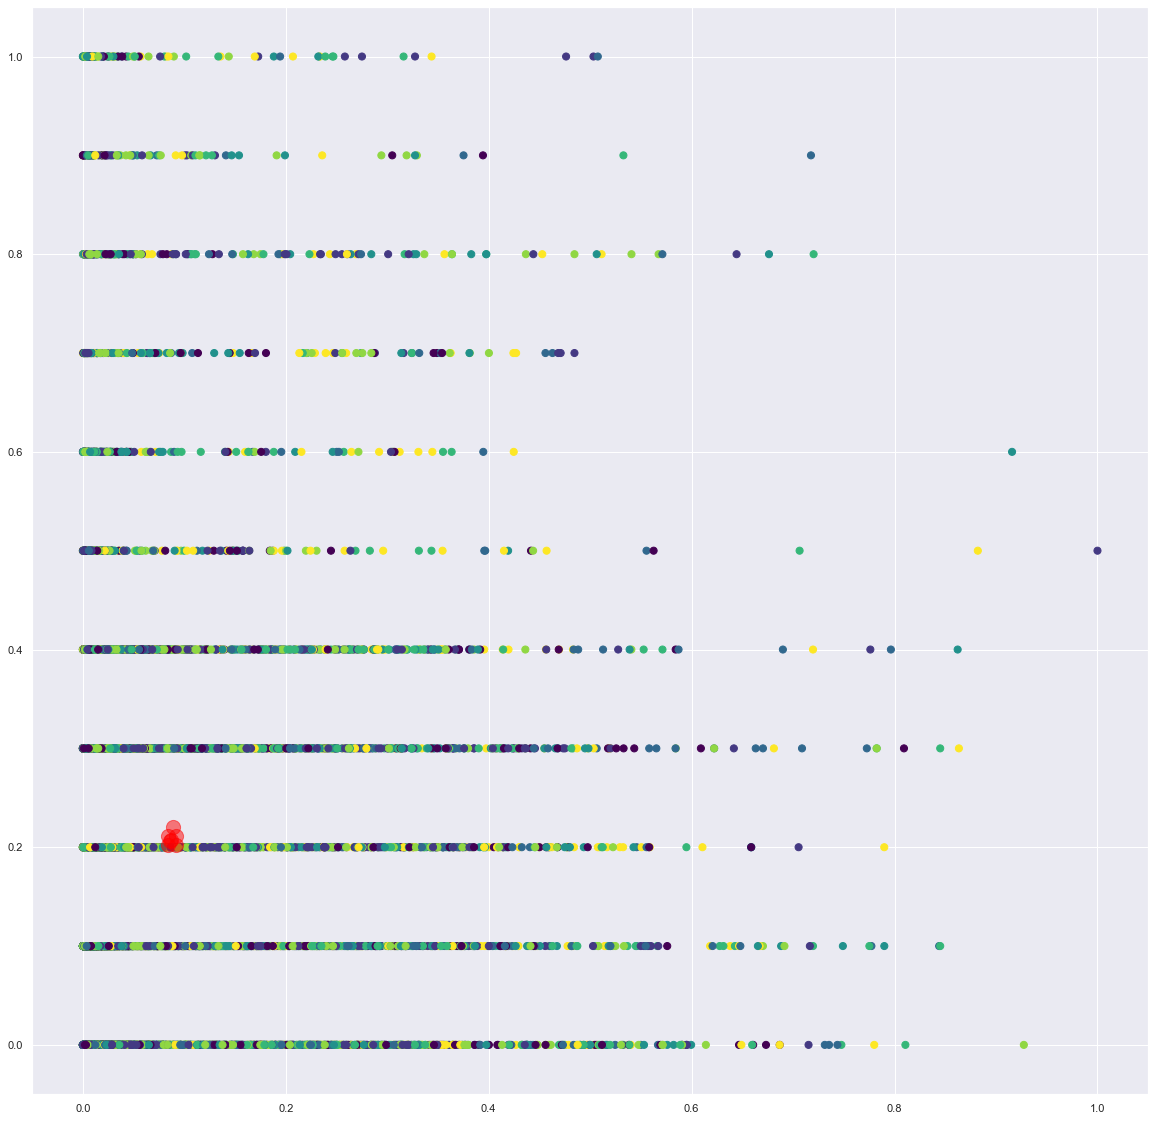

In [461]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=predictions, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

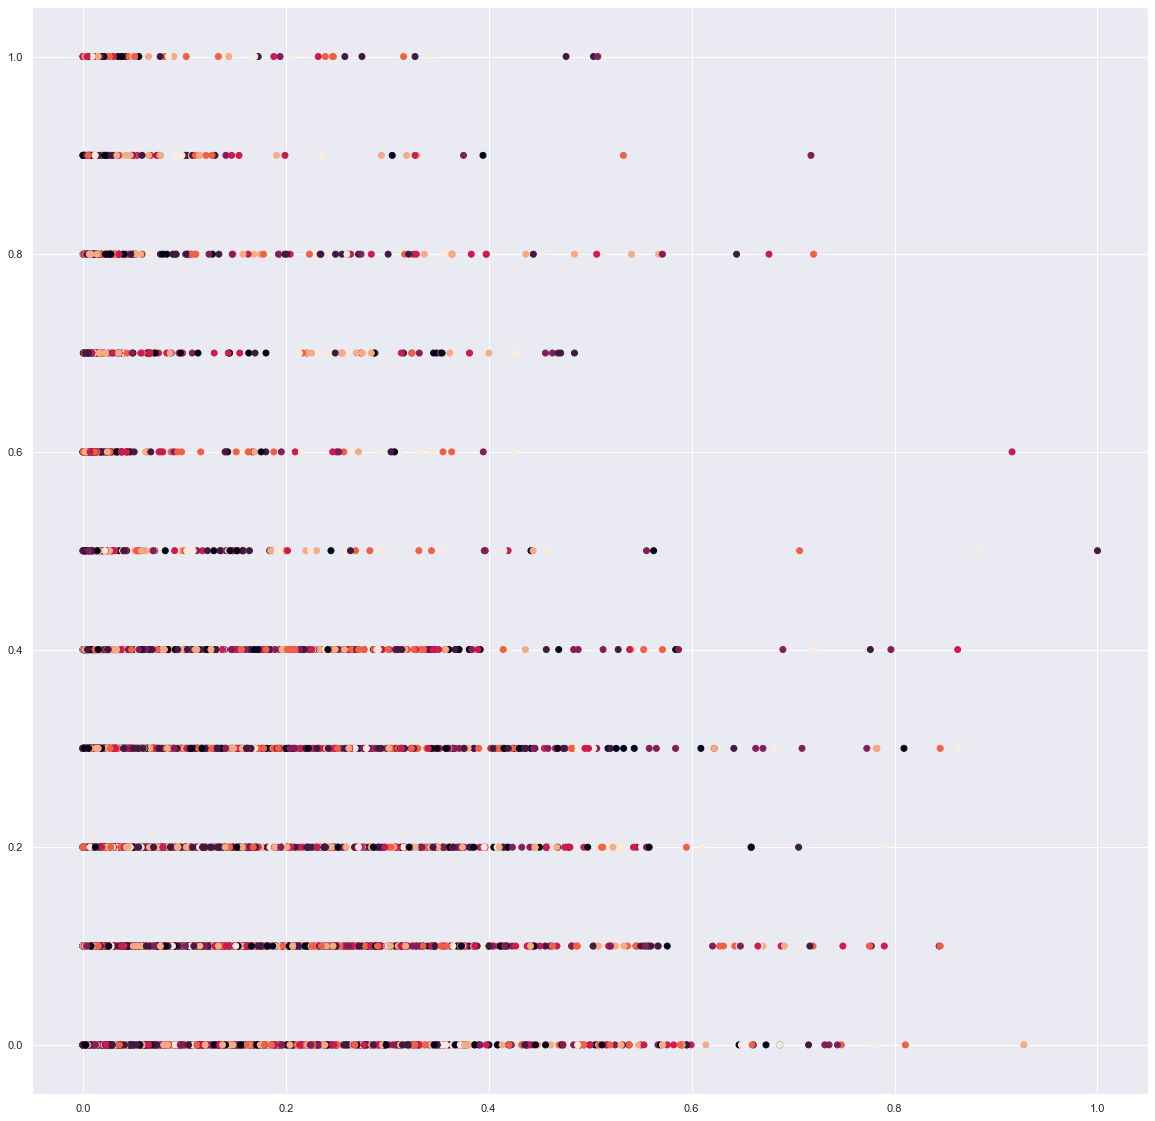

In [463]:
###this scatterplot is for the knn model 
import matplotlib.pyplot as plt
xs = X_train[:,0]
ys = X_train[:,1]
plt.scatter(xs,ys,c=predictions)
plt.show()

In [464]:
new_df

Population  Children       Age    Income  Outage_sec_perweek     Email  \
0       0.000340       0.0  0.704225  0.109120            0.373260  0.409091   
1       0.093393       0.1  0.126761  0.082599            0.549537  0.500000   
2       0.033393       0.4  0.450704  0.035818            0.504705  0.363636   
3       0.123943       0.1  0.422535  0.071848            0.701827  0.636364   
4       0.101493       0.0  0.915493  0.153646            0.381271  0.681818   
...          ...       ...       ...       ...                 ...       ...   
9995    0.005722       0.3  0.070423  0.214174            0.441369  0.500000   
9996    0.689924       0.4  0.422535  0.130653            0.314618  0.636364   
9997    0.003630       0.1  0.422535  0.176501            0.307529  0.409091   
9998    0.318060       0.1  0.295775  0.063117            0.567200  0.590909   
9999    0.109343       0.1  0.140845  0.033542            0.552173  0.727273   

      Contacts  Yearly_equip_failure    Tenure  MonthlyCharge  ...  \
0     0.000000              0.166667  0.081624       0.439985  ...   
1     0.000000              0.166667  0.002203       0.773872  ...   
2     0.000000              0.166667  0.207804       0.380474  ...   
3     0.285714              0.000000  0.226580       0.190207  ...   
4     0.285714              0.166667  0.009447       0.332900  ...   
...        ...                   ...       ...            ...  ...   
9995  0.285714              0.000000  0.946448       0.380626  ...   
9996  0.285714              0.000000  0.845647       0.606629  ...   
9997  0.000000              0.000000  0.653764       0.428179  ...   
9998  0.142857              0.000000  0.987272       0.821410  ...   
9999  0.142857              0.000000  0.878190       0.654221  ...   

      StreamingTV_No  StreamingTV_Yes  StreamingMovies_No  \
0                1.0              0.0                 0.0   
1                0.0              1.0                 0.0   
2                1.0              0.0                 0.0   
3                0.0              1.0                 1.0   
4                0.0              1.0                 1.0   
...              ...              ...                 ...   
9995             1.0              0.0                 1.0   
9996             0.0              1.0                 1.0   
9997             1.0              0.0                 1.0   
9998             0.0              1.0                 0.0   
9999             1.0              0.0                 0.0   

      StreamingMovies_Yes  PaperlessBilling_No  PaperlessBilling_Yes  \
0                     1.0                  0.0                   1.0   
1                     1.0                  0.0                   1.0   
2                     1.0                  0.0                   1.0   
3                     0.0                  0.0                   1.0   
4                     0.0                  1.0                   0.0   
...                   ...                  ...                   ...   
9995                  0.0                  1.0                   0.0   
9996                  0.0                  1.0                   0.0   
9997                  0.0                  0.0                   1.0   
9998                  1.0                  0.0                   1.0   
9999                  1.0                  0.0                   1.0   

      PaymentMethod_Bank Transfer(automatic)  \
0                                        0.0   
1                                        1.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
...                                      ...   
9995                                     0.0   
9996                                     0.0   
9997                                     1.0   
9998                                     0.0   
9999                                     0.0   

      PaymentMethod_Credit Ca

Total Variance in our dataset is:  10.316390808051903
The 95% variance we want to have is:  9.800571267649307

Variance explain with 20 n_compononets:  8.37330776771091
Variance explain with 25 n_compononets:  9.413646747745064
Variance explain with 27 n_compononets:  9.774198603061816
Variance explain with 30 n_compononets:  10.019344867790494
Variance explain with 35 n_compononets:  10.237947922823638
Variance explain with 40 n_compononets:  10.314799678811019
Variance explain with 41 n_compononets:  10.316389763251465
Variance explain with 45 n_compononets:  10.316390808051903
Variance explain with 50 n_compononets:  10.316390808051903
Variance explain with 53 n_compononets:  10.316390808051903
Variance explain with 55 n_compononets:  10.316390808051903
Variance explain with 60 n_compononets:  10.316390808051903
Variance explain with 70 n_compononets:  10.316390808051903
Variance explain with 80 n_compononets:  10.316390808051903


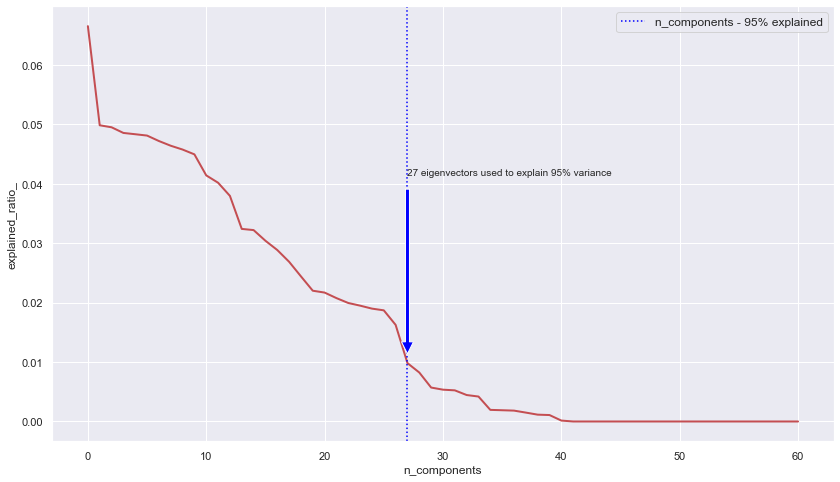

In [465]:
# Trying with Dimentionality reduction and then Kmeans

n_components = X_train.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X_train).transform(X_train)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%

print("Variance explain with 20 n_compononets: ", sum(a["Explained Variance"][0:20]))
print("Variance explain with 25 n_compononets: ", sum(a["Explained Variance"][0:25]))
print("Variance explain with 27 n_compononets: ", sum(a["Explained Variance"][0:27]))
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 41 n_compononets: ", sum(a["Explained Variance"][0:41]))
print("Variance explain with 45 n_compononets: ", sum(a["Explained Variance"][0:45]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))
print("Variance explain with 53 n_compononets: ", sum(a["Explained Variance"][0:53]))
print("Variance explain with 55 n_compononets: ", sum(a["Explained Variance"][0:55]))
print("Variance explain with 60 n_compononets: ", sum(a["Explained Variance"][0:60]))
print("Variance explain with 70 n_compononets: ", sum(a["Explained Variance"][0:70]))
print("Variance explain with 80 n_compononets: ", sum(a["Explained Variance"][0:80]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(27,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('27 eigenvectors used to explain 95% variance', xy=(27, pca.explained_variance_ratio_[27]), 
             xytext=(27, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

The innertia for : 2 Clusters is: 92239.13171084576
The innertia for : 3 Clusters is: 88538.50961621742
The innertia for : 4 Clusters is: 86359.83293586876
The innertia for : 5 Clusters is: 84877.41796421917
The innertia for : 6 Clusters is: 83631.43787276089
The innertia for : 7 Clusters is: 82537.36026106314
The innertia for : 8 Clusters is: 81730.53667749048
The innertia for : 9 Clusters is: 80901.92621561272
The innertia for : 10 Clusters is: 79992.06895781866
The innertia for : 11 Clusters is: 79361.17203176867
The innertia for : 12 Clusters is: 78853.77107483252
The innertia for : 13 Clusters is: 78073.88686310188
The innertia for : 14 Clusters is: 77561.91409263678
The innertia for : 15 Clusters is: 77102.34290717609
The innertia for : 16 Clusters is: 76432.87048795441
The innertia for : 17 Clusters is: 76313.63235673025
The innertia for : 18 Clusters is: 76008.46514736858
The innertia for : 19 Clusters is: 75724.79327900149
The innertia for : 20 Clusters is: 75211.9305970256
Th

Text(0.5, 1.0, 'Inertia Plot per k')

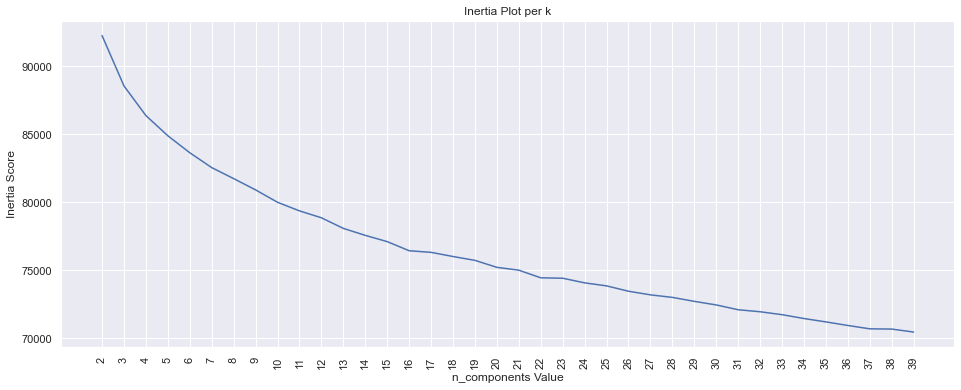

In [466]:
# Running PCA again

pca = PCA(n_components=27, random_state = 453)
X_r = pca.fit(X_train).transform(X_train)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

Text(0.5, 1.0, 'Inertia Plot per k')

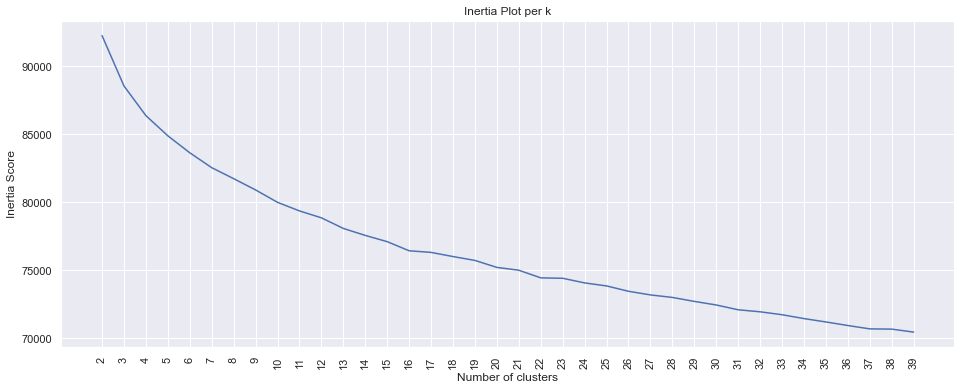

In [468]:
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [467]:
predictions
#filtered_label0 = X_train[label == 0]

array([1, 6, 1, ..., 2, 5, 1], dtype=int32)

In [469]:
from sklearn.metrics import silhouette_score
silhouette_score(X_train, kmeans.labels_)

0.03630438972960719

In [471]:

# Running PCA with 27 PC
pca = PCA(n_components=27, random_state = 453)
X_r = pca.fit(X_train).transform(X_train)

# Running Kmeans with 7 Ks
kmeans = KMeans(n_clusters=7, random_state=2)
kmeans = kmeans.fit(X_r)

clusters = kmeans.labels_

new_df['Clusters'] = clusters

# Creating a cluster Category
new_df['Clusters Category'] = 'No Data'
new_df['Clusters Category'].loc[new_df['Clusters'] == 0] = 'Cluster 1'
new_df['Clusters Category'].loc[new_df['Clusters'] == 1] = 'Cluster 2'
new_df['Clusters Category'].loc[new_df['Clusters'] == 2] = 'Cluster 3'
new_df['Clusters Category'].loc[new_df['Clusters'] == 3] = 'Cluster 4'
new_df['Clusters Category'].loc[new_df['Clusters'] == 4] = 'Cluster 5'
new_df['Clusters Category'].loc[new_df['Clusters'] == 5] = 'Cluster 6'
new_df['Clusters Category'].loc[new_df['Clusters'] == 6] = 'Cluster 7'

new_df.head(5)

/Users/miriamcorona/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/miriamcorona/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/miriamcorona/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

Population  Children       Age    Income  Outage_sec_perweek     Email  \
0    0.000340       0.0  0.704225  0.109120            0.373260  0.409091   
1    0.093393       0.1  0.126761  0.082599            0.549537  0.500000   
2    0.033393       0.4  0.450704  0.035818            0.504705  0.363636   
3    0.123943       0.1  0.422535  0.071848            0.701827  0.636364   
4    0.101493       0.0  0.915493  0.153646            0.381271  0.681818   

   Contacts  Yearly_equip_failure    Tenure  MonthlyCharge  ...  \
0  0.000000              0.166667  0.081624       0.439985  ...   
1  0.000000              0.166667  0.002203       0.773872  ...   
2  0.000000              0.166667  0.207804       0.380474  ...   
3  0.285714              0.000000  0.226580       0.190207  ...   
4  0.285714              0.166667  0.009447       0.332900  ...   

   StreamingMovies_No  StreamingMovies_Yes  PaperlessBilling_No  \
0                 0.0                  1.0                  0.0   
1                 0.0                  1.0                  0.0   
2                 0.0                  1.0                  0.0   
3                 1.0                  0.0                  0.0   
4                 1.0                  0.0                  1.0   

   PaperlessBilling_Yes  PaymentMethod_Bank Transfer(automatic)  \
0                   1.0                                     0.0   
1                   1.0                                     1.0   
2                   1.0                                     0.0   
3                   1.0                                     0.0   
4                   0.0                                     0.0   

   PaymentMethod_Credit Card (automatic)  PaymentMethod_Electronic Check  \
0                                    1.0                             0.0   
1                                    0.0                             0.0   
2                                    1.0                             0.0   
3                                    0.0                             0.0   
4                                    0.0                             0.0   

   PaymentMethod_Mailed Check  Clusters  Clusters Category  
0                         0.0         2          Cluster 3  
1                         0.0         1          Cluster 2  
2                         0.0         4          Cluster 5  
3                         1.0         6          Cluster 7  
4                         1.0         5          Cluster 6  

[5 rows x 63 columns]

###The following code is used to remove all categorical variables

In [300]:
df = pd.read_csv('churn_clean.csv')

In [301]:
df.dtypes

CaseOrder                 int64
Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSe

In [302]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [303]:
xdf = df[['Population','Age', 'Income','Outage_sec_perweek', 'Email', \
          'Contacts', 'Yearly_equip_failure','Tenure', 'MonthlyCharge','Bandwidth_GB_Year']]

In [304]:
xdf.head()

Population  Age    Income  Outage_sec_perweek  Email  Contacts  \
0          38   68  28561.99            7.978323     10         0   
1       10446   27  21704.77           11.699080     12         0   
2        3735   50   9609.57           10.752800      9         0   
3       13863   48  18925.23           14.913540     15         2   
4       11352   83  40074.19            8.147417     16         2   

   Yearly_equip_failure     Tenure  MonthlyCharge  Bandwidth_GB_Year  
0                     1   6.795513     172.455519         904.536110  
1                     1   1.156681     242.632554         800.982766  
2                     1  15.754144     159.947583        2054.706961  
3                     0  17.087227     119.956840        2164.579412  
4                     1   1.670972     149.948316         271.493436

In [305]:
scaler = MinMaxScaler()
#xdf = scaler.fit_transform(xdf)
xdf[xdf.columns] = scaler.fit_transform(xdf[xdf.columns])

/Users/miriamcorona/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/miriamcorona/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [306]:
xdf.head()


Population       Age    Income  Outage_sec_perweek     Email  Contacts  \
0    0.000340  0.704225  0.109120            0.373260  0.409091  0.000000   
1    0.093393  0.126761  0.082599            0.549537  0.500000  0.000000   
2    0.033393  0.450704  0.035818            0.504705  0.363636  0.000000   
3    0.123943  0.422535  0.071848            0.701827  0.636364  0.285714   
4    0.101493  0.915493  0.153646            0.381271  0.681818  0.285714   

   Yearly_equip_failure    Tenure  MonthlyCharge  Bandwidth_GB_Year  
0              0.166667  0.081624       0.439985           0.106951  
1              0.166667  0.002203       0.773872           0.092165  
2              0.166667  0.207804       0.380474           0.271180  
3              0.000000  0.226580       0.190207           0.286868  
4              0.166667  0.009447       0.332900           0.016561

In [307]:
plop = xdf.values

In [308]:
kmeans = KMeans(n_clusters=5, random_state=540)
kmeans = kmeans.fit(plop)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia is: ", kmeans.inertia_)

The clusters are:  [0 3 3 ... 2 4 4]
The Inertia is:  1728.0088072167575


In [309]:
no_of_clusters = range(2,40) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(plop)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

The innertia for : 2 Clusters is: 2450.411731942986
The innertia for : 3 Clusters is: 2129.4900479880453
The innertia for : 4 Clusters is: 1811.190095733259
The innertia for : 5 Clusters is: 1728.007226528599
The innertia for : 6 Clusters is: 1647.5418597352268
The innertia for : 7 Clusters is: 1584.4802436899383
The innertia for : 8 Clusters is: 1522.6585587494833
The innertia for : 9 Clusters is: 1481.375600909834
The innertia for : 10 Clusters is: 1440.1449863083942
The innertia for : 11 Clusters is: 1410.517520056372
The innertia for : 12 Clusters is: 1386.528365325279
The innertia for : 13 Clusters is: 1363.2618810574675
The innertia for : 14 Clusters is: 1344.3168742775508
The innertia for : 15 Clusters is: 1325.6349845716018
The innertia for : 16 Clusters is: 1307.7005480941777
The innertia for : 17 Clusters is: 1291.000406758655
The innertia for : 18 Clusters is: 1265.4569305220157
The innertia for : 19 Clusters is: 1249.7477887248938
The innertia for : 20 Clusters is: 1234.376

Text(0.5, 1.0, 'Inertia Plot per k')

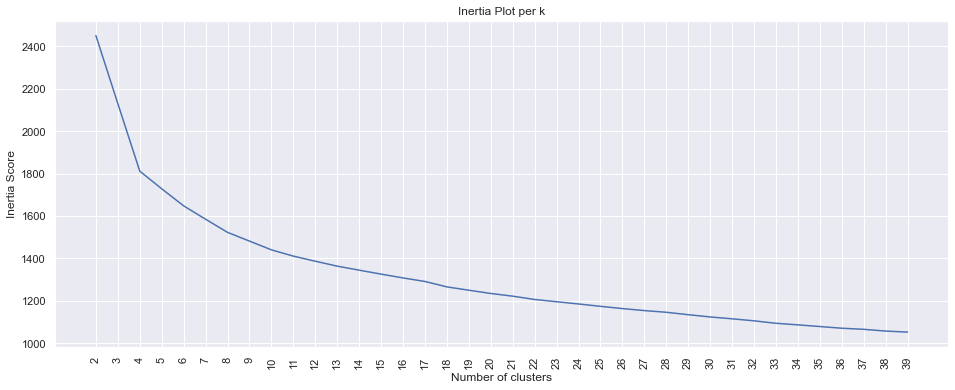

In [310]:
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [314]:
# Running K means on 7 clusters

kmeans = KMeans(n_clusters=7, random_state=2)
kmeans = kmeans.fit(plop)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(plop)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,7)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4","Cluster 5","Cluster 6"])

# display
countscldf

Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5  Cluster 6
0       2187       1568       1082       1560        956       1727        920

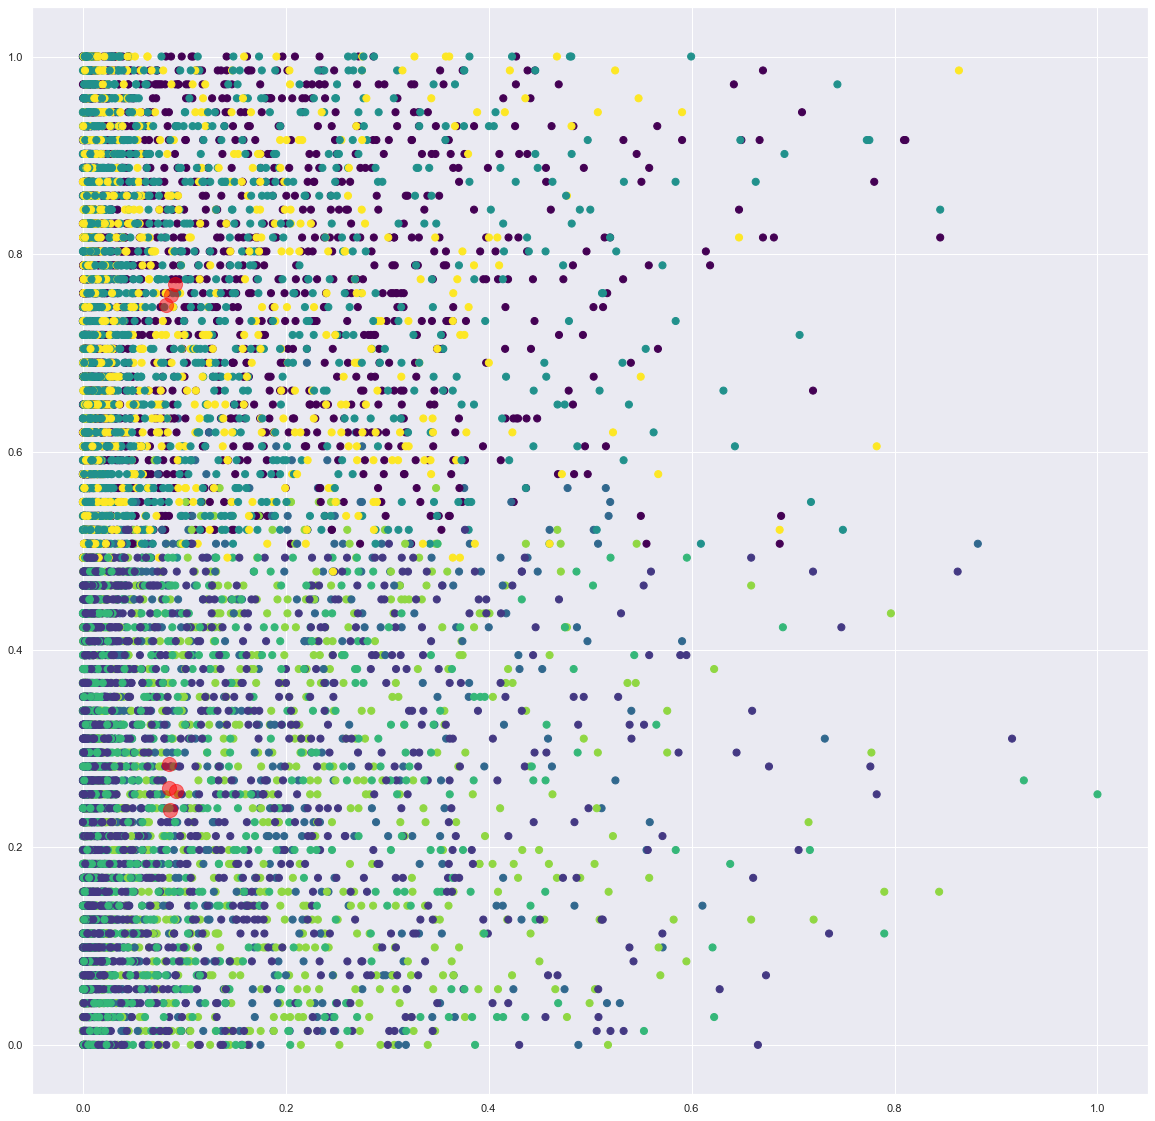

In [315]:
plt.scatter(plop[:, 0], plop[:, 1], c=predictions, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [316]:
display(kmeans.labels_)

array([0, 2, 5, ..., 1, 4, 4], dtype=int32)

In [327]:
score = silhouette_score(new_xdf, kmeans.labels_, metric='euclidean')

In [328]:
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.129


In [342]:
clusters = []
inertia_vals = []
# Since creating one cluster is similar to observing the data as a whole, multiple values of K are utilized to come up with the optimum cluster value
#Note: Cluster number and intra cluster distance is appended for plotting the elbow curve
for k in range(1, 10, 1):
    
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=2)
    model.fit(plop)
# append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

In [343]:
from sklearn.metrics import silhouette_score
for i in range(1,9,1):
    
    print("---------------------------------------")
    print(clusters[i])
    print("Silhouette score:",silhouette_score(plop, clusters[i].predict(plop)))

---------------------------------------
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)
Silhouette score: 0.4087213907240095
---------------------------------------
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)
Silhouette score: 0.29973953504376155
---------------------------------------
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)
Silhouette score: 0.22801265475645296
---------------------------------------
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random

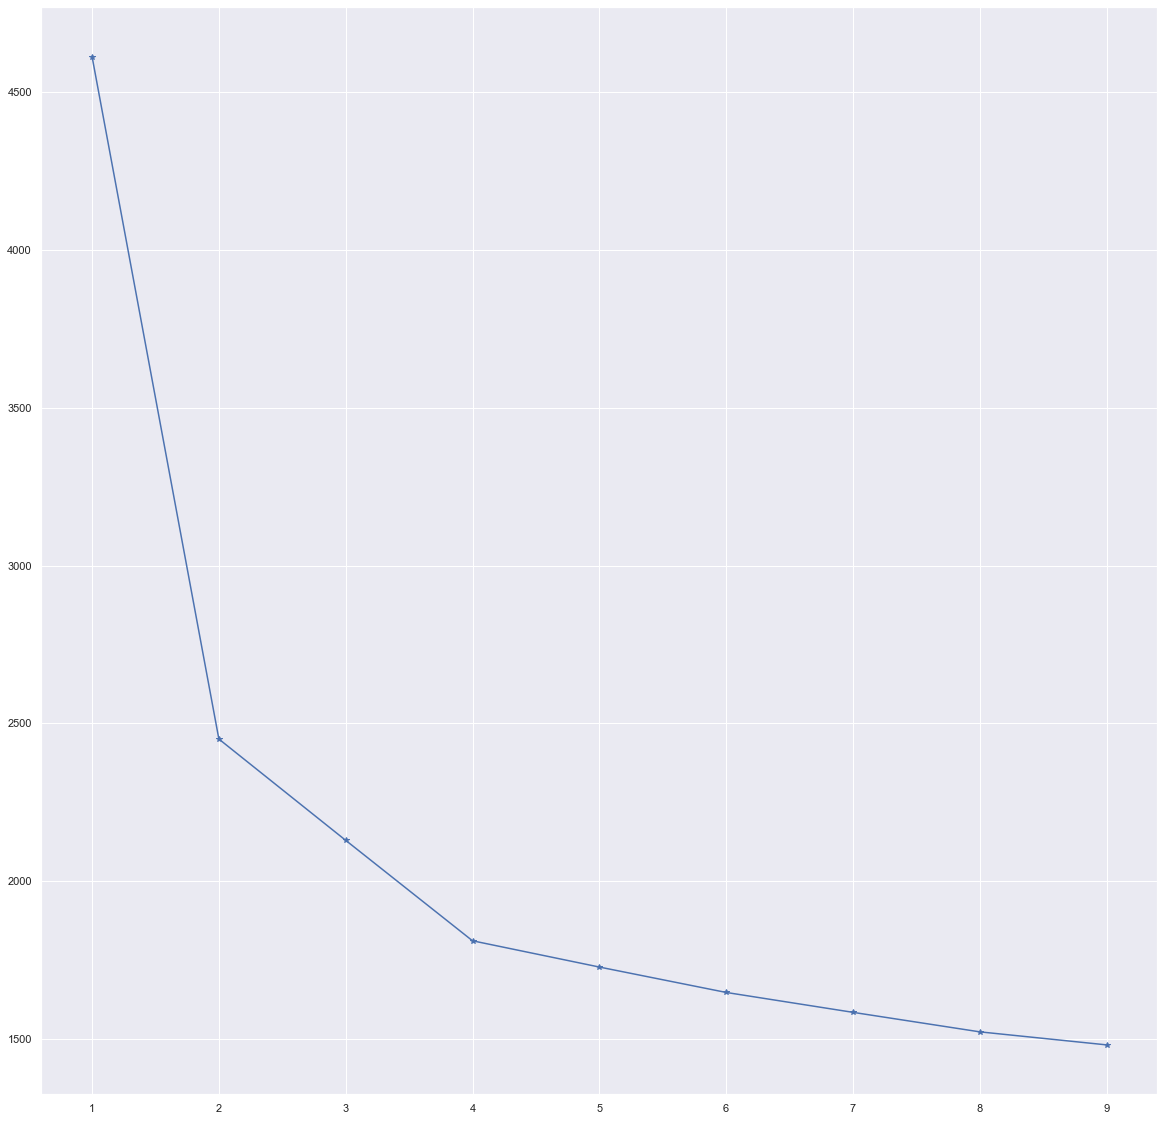

In [344]:
# plot the inertia vs K values
plt.plot(range(1,10,1),inertia_vals,marker='*')
plt.show()